# ML Proyecto 1
Integrantes:
Francisco Torres
Eliam Rivas
Vicente Poblete
Manuel Vidal

# Importacion y Nuevas Columnas

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('dataset_elpino.csv', sep=";")
df.head()
df.shape

(14561, 68)

In [36]:
# Limpieza de los headers para que tenga solo los codigos

df_mod = df.copy()

for col in df_mod.columns:
  col = col.split("-")[0].strip()
  if col.startswith("Diag") or col.startswith("Proc"):
    nombre_col = col.split(" ")
    nombre_fin = nombre_col[0]+ nombre_col[1]
    df_mod = df_mod.rename(columns={col: nombre_fin})

df_mod["Sexo_bin"] = df_mod["Sexo (Desc)"].apply(lambda x: 0 if x=="Mujer" else 1)


df_mod = df_mod.applymap(lambda x: x.split('-')[0].strip() if isinstance(x,str) and x != "-" else x)

diag_cols = [col for col in df_mod.columns if 'Diag' in col]
proced_cols = [col for col in df_mod.columns if 'Proced' in col]
# Con esto podemos transformar los ' - ' en nulos, hay que ver si hacerlo
# lo hice, me canse del - xd
df_mod[diag_cols] = df_mod[diag_cols].replace('-', np.nan)
df_mod[proced_cols] = df_mod[proced_cols].replace('-', np.nan)

df_mod.shape
# df_mod es df pero con menos texto, solo con los identificadores de diagnostico, procedimiento y grd


C:\Users\Francisco\AppData\Local\Temp\ipykernel_5064\2220723612.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod = df_mod.applymap(lambda x: x.split('-')[0].strip() if isinstance(x,str) and x != "-" else x)


(14561, 69)

In [37]:
df_mod.head()

Diag01 Diag02 Diag03  Diag04  Diag05  Diag06 Diag07  Diag08 Diag09 Diag10  \
0  A41.8  B37.6  I39.8     N10   B96.1   L89.9  L08.9   B96.2  A41.5  J86.9   
1  U07.1  J12.8  R06.0     R05   R50.9   Z29.0  Z01.7  J96.00  J94.2  J92.9   
2  K56.5  R57.2  R57.1     J80     Y95   J15.0  U82.2   B95.6  B96.8  B37.1   
3  K76.8  K66.1  N18.5   D64.9   E87.5   E87.2    J81   N17.8  J44.9  R41.0   
4  T81.0  Y83.2  S31.1  S36.80  W31.62  J96.09  J15.0   U82.2  U07.1  N39.0   

   ... Proced25 Proced26 Proced27 Proced28 Proced29 Proced30 Edad en años  \
0  ...    88.72    90.42    90.52    91.39    91.33    87.03           40   
1  ...    90.43    91.39    90.52    91.32    96.59    90.99           53   
2  ...    91.73    90.53    99.26    89.39    89.66    89.65           65   
3  ...    00.13    00.17    99.04    99.18    99.21    99.23           61   
4  ...    91.39    91.32    93.90    99.15    96.59    45.13           30   

  Sexo (Desc)     GRD Sexo_bin  
0      Hombre  184103        1  
1      Hombre  041013        1  
2      Hombre  041013        1  
3      Hombre  041023        1  
4      Hombre  041023        1  

[5 rows x 69 columns]

# Completitud

## Nulos

In [38]:
### Completitud
#La completitud evalúa si faltan datos o si hay información incompleta. Aquí hay algunas maneras de evaluarla:
# a) Valores nulos o faltantes Revisa si hay valores NA, NULL, vacíos o marcadores especiales (como -9999, "?", etc.).
df_mod.isnull().sum()

Diag01              0
Diag02           1209
Diag03           2687
Diag04           4127
Diag05           5371
Diag06           6394
Diag07           7408
Diag08           8584
Diag09           9719
Diag10          10696
Diag11          11574
Diag12          12238
Diag13          12761
Diag14          13130
Diag15          13423
Diag16          13638
Diag17          13802
Diag18          13938
Diag19          14046
Diag20          14132
Diag21          14208
Diag22          14257
Diag23          14308
Diag24          14346
Diag25          14367
Diag26          14407
Diag27          14431
Diag28          14451
Diag29          14468
Diag30          14485
Diag31          14494
Diag32          14504
Diag33          14518
Diag34          14521
Diag35          14533
Proced01            0
Proced02          134
Proced03          342
Proced04          605
Proced05          962
Proced06         1480
Proced07         2135
Proced08         3012
Proced09         3937
Proced10         4982
Proced11  

## Analisis nulos y duplicados

In [39]:
# Tiene varios valores nulos, los que son esperados ya que se les realiza una
# cantidad distinta de diagnosticos y procedimientos a cada persona
# Entonces, no tenemos razon para tratar estos nulos o faltantes
i= 0
for col in df_mod.columns:
  nulos = df_mod[col].isna().sum()
  if nulos == df_mod.shape[0]:
    i+=1
    print(col, nulos)
print(f"Cant de columnas totalmente vacias: {i}")
# No hay columnas totalmente vacias
void_rows = df_mod[df_mod.isnull().all(axis=1)]
print(f"Cant de rows totalmente vacias: {void_rows.shape[0]}")
# No hay filas totalmente vacias

# Ademas las columnas de edad, sexo, y grd no tienen ningun registro vacio
# lo cual es importasnte

## Duplicados
dupes = df_mod[df_mod.duplicated(keep=False)]
dupes

dupes_sobre_0 = dupes[dupes["Edad en años"] > 0]
dupes_sobre_0

# Tipos de duplicado
# 1) El principal son los bebes recien nacidos, a lo que se les realiza una revision general,
# estos se mantienen porque son procedimientos y diagnosticos esperados de un recien nacido
# 2) El segundo son los partos que tienen los diagnosticos O34.2 	O82.0 	Z37.0 	Z38.0 	Z39.0 	Z39.1 	Z39.2,
# los que sugieren que durante el parte sucedio un desgarro o complicaciones, lo cual consideramos sigue un comportamiento regular
# y ademas se repite en distintas edades y en registros distanciados, por lo cual lo mantenemos
# 3) el tercero es en un bebe de 1 año que los diagnosticos sugieren que se cayo fuerte, algo que podria pasar en mas de una ocasion
# sobretodo en un infante de 1 año
# 4) el ultimo es el caso de una extirpacion de un tejido cicatrizado o fibrosis, siendo procedimiento ambulatoreios
# normales, los cuales no seran eliminados



Cant de columnas totalmente vacias: 0
Cant de rows totalmente vacias: 0


Diag01  Diag02 Diag03 Diag04 Diag05 Diag06 Diag07 Diag08 Diag09 Diag10  \
1476   O34.2   O82.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
4576   O70.0   O80.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
4646   O70.0   O80.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
5161   O70.0   O80.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
5664   L90.5     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7484   O70.0   O80.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
8117   O34.2   O82.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
8529   O34.2   O82.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   
9658   S00.9  W06.04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9947   L90.5     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10702  S00.9  W06.04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11288  O34.2   O82.0  Z37.0  Z38.0  Z39.0  Z39.1  Z39.2    NaN    NaN    NaN   

       ... Proced25 Proced26 Proced27 Proced28 Proced29 Proced30 Edad en años  \
1476   ...      NaN      NaN      NaN      NaN      NaN      NaN           25   
4576   ...      NaN      NaN      NaN      NaN      NaN      NaN           34   
4646   ...      NaN      NaN      NaN      NaN      NaN      NaN           23   
5161   ...      NaN      NaN      NaN      NaN      NaN      NaN           34   
5664   ...      NaN      NaN      NaN      NaN      NaN      NaN           41   
7484   ...      NaN      NaN      NaN      NaN      NaN      NaN           23   
8117   ...      NaN      NaN      NaN      NaN      NaN      NaN           31   
8529   ...      NaN      NaN      NaN      NaN      NaN      NaN           31   
9658   ...      NaN      NaN      NaN      NaN      NaN      NaN            1   
9947   ...      NaN      NaN      NaN      NaN      NaN      NaN           41   
10702  ...      NaN      NaN      NaN      NaN      NaN      NaN            1   
11288  ...      NaN      NaN      NaN      NaN      NaN      NaN           25   

      Sexo (Desc)     GRD Sexo_bin  
1476        Mujer  146101        0  
4576        Mujer  146121        0  
4646        Mujer  146121        0  
5161        Mujer  146121        0  
5664        Mujer  091401        0  
7484        Mujer  146121        0  
8117        Mujer  146101        0  
8529        Mujer  146101        0  
9658       Hombre  094131        1  
9947        Mujer  091401        0  
10702      Hombre  094131        1  
11288       Mujer  146101        0  

[12 rows x 69 columns]

# Correctitud

## Formato y tipo de dato

In [40]:
#La correctitud verifica si los datos que sí están presentes son correctos o válidos.
# a) Formato y tipo de dato
df_mod.dtypes
# Todos siguen los formatos correctos

Diag01          object
Diag02          object
Diag03          object
Diag04          object
Diag05          object
Diag06          object
Diag07          object
Diag08          object
Diag09          object
Diag10          object
Diag11          object
Diag12          object
Diag13          object
Diag14          object
Diag15          object
Diag16          object
Diag17          object
Diag18          object
Diag19          object
Diag20          object
Diag21          object
Diag22          object
Diag23          object
Diag24          object
Diag25          object
Diag26          object
Diag27          object
Diag28          object
Diag29          object
Diag30          object
Diag31          object
Diag32          object
Diag33          object
Diag34          object
Diag35          object
Proced01        object
Proced02        object
Proced03        object
Proced04        object
Proced05        object
Proced06        object
Proced07        object
Proced08        object
Proced09   

## Fuera de rango

In [41]:
# Valores fuera de rango

edad_mala = df_mod[df_mod["Edad en años"] < 0]
edad_mala

Empty DataFrame
Columns: [Diag01, Diag02, Diag03, Diag04, Diag05, Diag06, Diag07, Diag08, Diag09, Diag10, Diag11, Diag12, Diag13, Diag14, Diag15, Diag16, Diag17, Diag18, Diag19, Diag20, Diag21, Diag22, Diag23, Diag24, Diag25, Diag26, Diag27, Diag28, Diag29, Diag30, Diag31, Diag32, Diag33, Diag34, Diag35, Proced01, Proced02, Proced03, Proced04, Proced05, Proced06, Proced07, Proced08, Proced09, Proced10, Proced11, Proced12, Proced13, Proced14, Proced15, Proced16, Proced17, Proced18, Proced19, Proced20, Proced21, Proced22, Proced23, Proced24, Proced25, Proced26, Proced27, Proced28, Proced29, Proced30, Edad en años, Sexo (Desc), GRD, Sexo_bin]
Index: []

[0 rows x 69 columns]

In [42]:
# sexo mal definido
sexo_mal_def = df_mod[~df_mod["Sexo (Desc)"].isin(["Hombre", "Mujer"])]
sexo_mal_def


Empty DataFrame
Columns: [Diag01, Diag02, Diag03, Diag04, Diag05, Diag06, Diag07, Diag08, Diag09, Diag10, Diag11, Diag12, Diag13, Diag14, Diag15, Diag16, Diag17, Diag18, Diag19, Diag20, Diag21, Diag22, Diag23, Diag24, Diag25, Diag26, Diag27, Diag28, Diag29, Diag30, Diag31, Diag32, Diag33, Diag34, Diag35, Proced01, Proced02, Proced03, Proced04, Proced05, Proced06, Proced07, Proced08, Proced09, Proced10, Proced11, Proced12, Proced13, Proced14, Proced15, Proced16, Proced17, Proced18, Proced19, Proced20, Proced21, Proced22, Proced23, Proced24, Proced25, Proced26, Proced27, Proced28, Proced29, Proced30, Edad en años, Sexo (Desc), GRD, Sexo_bin]
Index: []

[0 rows x 69 columns]

In [43]:
# Los datos estan bien definidos

# Outliers


## Outliers edad

Estadístico: 0.06742433176661289, pvalue 5.345377429029912e-58
Limite interior: -32.5
Limite superior: 115.5
     Diag01 Diag02 Diag03 Diag04 Diag05 Diag06 Diag07 Diag08 Diag09 Diag10  \
2588  Z76.2  P07.3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ... Proced25 Proced26 Proced27 Proced28 Proced29 Proced30 Edad en años  \
2588  ...      NaN      NaN      NaN      NaN      NaN      NaN          121   

     Sexo (Desc)     GRD Sexo_bin  
2588       Mujer  224121        0  

[1 rows x 69 columns]


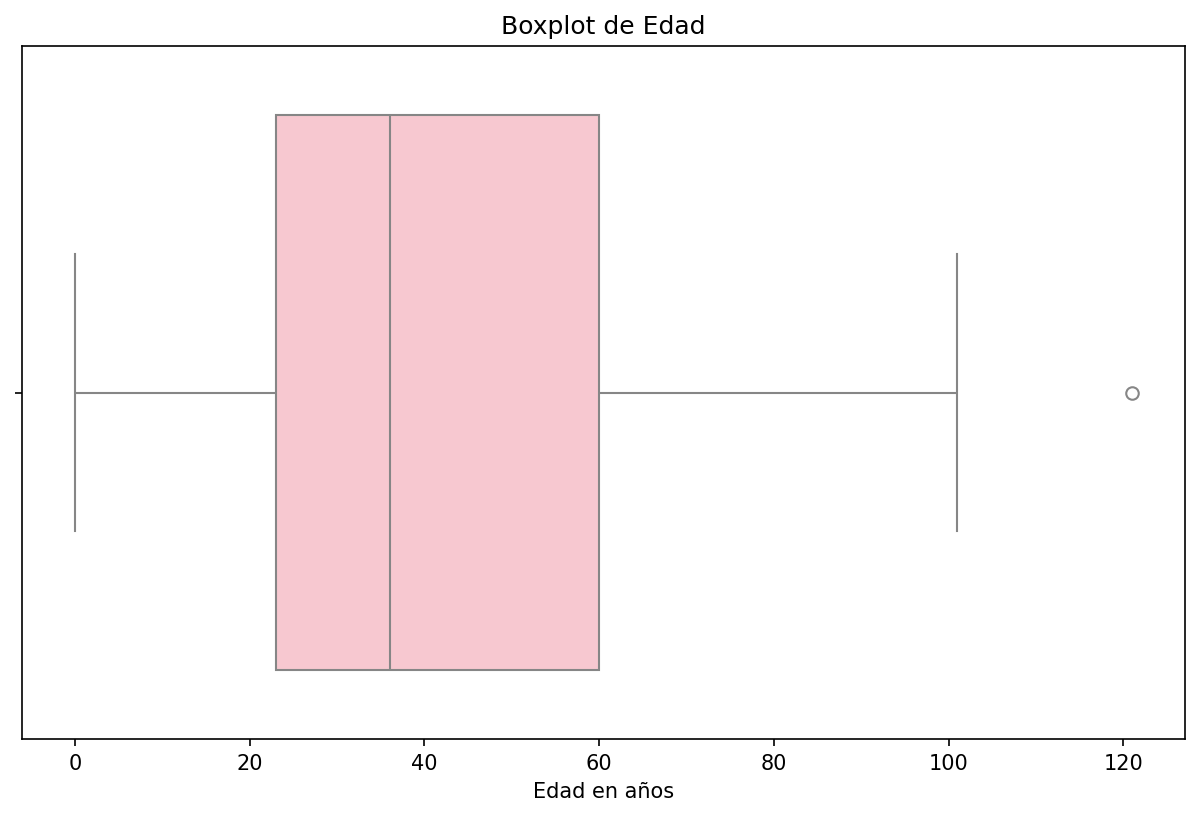

In [44]:
import scipy.stats as stats
import seaborn as sns
from scipy.stats import kstest

pd.set_option('display.max_rows', None)
### Outliers
## Primero, edad

# Ver si en distribucion normal
df_mod["Edad en años"].value_counts()
norm = (df_mod["Edad en años"] - df_mod["Edad en años"].mean()) / df_mod["Edad en años"].std()
estadistico, p_value = kstest(norm, 'norm')
print(f'Estadístico: {estadistico}, pvalue {p_value}')
# No lo es
# Usamos iqr para los outliers entonces
edades = df_mod['Edad en años']
q1_edades = edades.quantile(0.25)
q3_edades = edades.quantile(0.75)
iqr_edades = q3_edades - q1_edades

limite_interior = q1_edades - 1.5 * iqr_edades
limite_superior = q3_edades + 1.5 * iqr_edades

outliers_edades = df_mod[(edades < limite_interior) | (edades > limite_superior)]


print('Limite interior:', limite_interior)
print('Limite superior:', limite_superior)
print(outliers_edades)

plt.figure(figsize=(10, 6), dpi=150)  
sns.boxplot(x=df['Edad en años'], color='pink')
plt.title('Boxplot de Edad')
plt.show()


# La mitica mujer de 121 es outlier
# Se elimina ya que con examinacion mas profunda, los diagnosticos y procedimientos
# no coinciden con lo que deberia ser


## Outliers cant diag y proced

Limite inferior Diag:  -7.5
Limite superior Diag:  20.5
Limite inferior Proced:  -4.0
Limite superior Proced:  28.0
(353, 71) 65.5042492917847
(1182, 71) 61.69458544839255


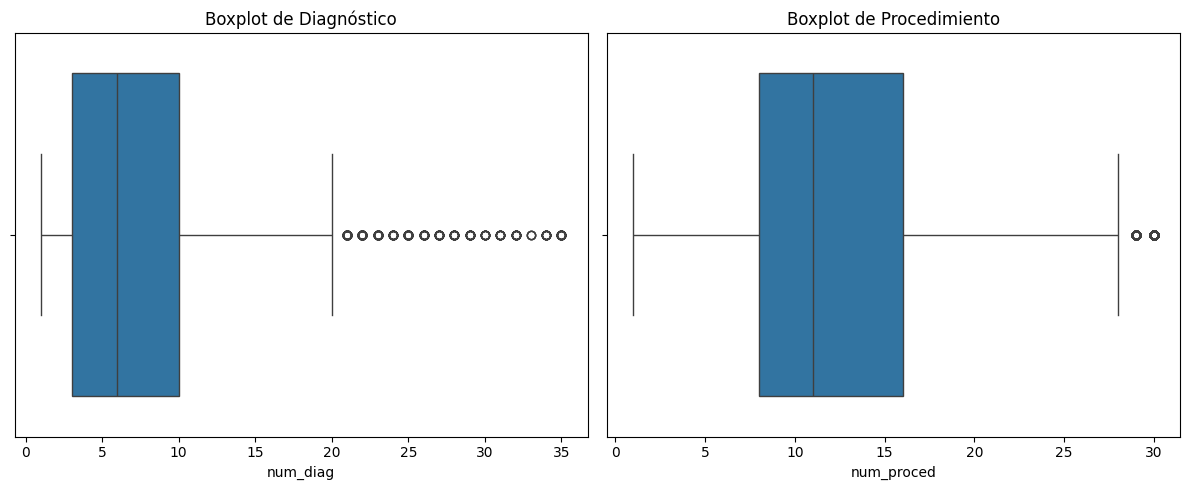

3.0
10.0
8.0
16.0
23.0
60.0
Edad en años    36.0
Sexo_bin         0.0
num_diag         6.0
num_proced      11.0
dtype: float64


In [45]:
## Diagnosticos y Procedimiento

# IDEA: Ver la cantidad de diagnosticos y proced de cada fila, contarlos
# y luego ver outliers asi

df_mod['num_diag'] = df_mod[diag_cols].notna().sum(axis=1)
df_mod['num_proced'] = df_mod[proced_cols].notna().sum(axis=1)
df_mod.head()

num_diag = df_mod['num_diag']
q1_diag = num_diag.quantile(0.25)
q3_diag = num_diag.quantile(0.75)
iqr_diag = q3_diag - q1_diag
limite_interior_diag = q1_diag - 1.5 * iqr_diag
limite_superior_diag = q3_diag + 1.5 * iqr_diag

num_proced = df_mod['num_proced']
q1_proced = num_proced.quantile(0.25)
q3_proced = num_proced.quantile(0.75)
iqr_proced = q3_proced - q1_proced
limite_interior_proced = q1_proced - 1.5 * iqr_proced
limite_superior_proced = q3_proced + 1.5 * iqr_proced

print("Limite inferior Diag: ", limite_interior_diag)
print("Limite superior Diag: ", limite_superior_diag)
print("Limite inferior Proced: ", limite_interior_proced)
print("Limite superior Proced: ", limite_superior_proced)
outlier_num_diag = df_mod[(num_diag < limite_interior_diag) | (num_diag > limite_superior_diag)]
outlier_num_proced = df_mod[(num_proced < limite_interior_proced) | (num_proced > limite_superior_proced)]

print(outlier_num_diag.shape, outlier_num_diag['Edad en años'].mean())
print(outlier_num_proced.shape, outlier_num_proced['Edad en años'].mean())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=num_diag, ax=axes[0])
axes[0].set_title('Boxplot de Diagnóstico')
sns.boxplot(x=num_proced, ax=axes[1])
axes[1].set_title('Boxplot de Procedimiento')
plt.tight_layout()
plt.show()

print(q1_diag)
print(q3_diag)
print(q1_proced)
print(q3_proced)
print(q1_edades)
print(q3_edades)
median_mod =df_mod.median(numeric_only=True)
print(median_mod)

#df_mod["num_diag"].value_counts()
#df_mod["num_proced"].value_counts()

## GRD
# En mi opinion no tiene sentido revisar outliers de aqui por que nuestro
# objetivo de prediccion y ademas tienen un significado peculiar los codigos


## Extrayendo los outliers del dataset, creando df_mod_clean

In [46]:
outliers_edades
#df mod clean es el df modificado para ser mas corto, y sacandole los outliers
df_mod_clean = df_mod.copy()

outliers_index = outliers_edades.index.union(outlier_num_diag.index).union(outlier_num_proced.index)
df_mod_clean = df_mod_clean.drop(outliers_index)

print("Cant outliers a eliminar: ", outliers_index.shape)
#df_mod_clean = df_mod_clean.drop(outlier_num_diag.index)
#df_mod_clean = df_mod_clean.drop(outlier_num_proced.index)
#df_mod_clean = df_mod_clean.drop(outliers_edades.index)

print(f"Shape df clean {df_mod_clean.shape}")
print(f"Shape df normal {df_mod.shape}")

test_sin_digito = df_mod_clean
test_sin_digito['GRD'] = test_sin_digito['GRD'].astype(str).str[:-1]
test_sin_digito.head()

Cant outliers a eliminar:  (1245,)
Shape df clean (13316, 71)
Shape df normal (14561, 71)


Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09 Diag10  \
12  F20.6  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN    NaN   
15  I20.0  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10  U07.1   
20  P22.1  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7  Z65.3   
26  D64.8    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5  E11.9   
32  K86.8  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ... Proced27 Proced28 Proced29 Proced30 Edad en años Sexo (Desc)    GRD  \
12  ...      NaN      NaN      NaN      NaN           30       Mujer  19410   
15  ...      NaN      NaN      NaN      NaN           69      Hombre  05420   
20  ...      NaN      NaN      NaN      NaN            0       Mujer  15812   
26  ...     89.7    90.59      NaN      NaN           47       Mujer  16413   
32  ...      NaN      NaN      NaN      NaN           36       Mujer  07412   

   Sexo_bin num_diag num_proced  
12        0        3         19  
15        1       16         24  
20        0       10         24  
26        0       15         28  
32        0        3         24  

[5 rows x 71 columns]

# Estadisticas descriptivas

In [47]:
### Estadisticas descriptivas
# Datos numericos

df_mod_clean.head()
df_mod_clean.describe()

Edad en años      Sexo_bin      num_diag    num_proced
count  13316.000000  13316.000000  13316.000000  13316.000000
mean      37.315710      0.320892      6.277936     11.699534
std       24.107814      0.466837      3.938776      5.641292
min        0.000000      0.000000      1.000000      1.000000
25%       22.000000      0.000000      3.000000      8.000000
50%       34.000000      0.000000      6.000000     11.000000
75%       56.000000      1.000000      9.000000     14.000000
max      101.000000      1.000000     20.000000     28.000000

### Medidas de tendencia central y dispersion

In [48]:

from scipy.stats import skew, kurtosis
## Tendencia central
# moda, listo
# mediana, listo
# moda, listo

mode = df_mod_clean.mode(numeric_only=True)
print("Moda \n", mode)
median =df_mod_clean.median(numeric_only=True)
print("Mediana \n", median)

## Dispersion
# desv std, listo
# min, listo
# max, listo
# iqr

edad = df_mod_clean["Edad en años"]
sexo_bin = df_mod_clean["Sexo_bin"]
num_diag = df_mod_clean["num_diag"]
num_proced = df_mod_clean["num_proced"]

cosas = [edad, sexo_bin, num_diag, num_proced]
print()
for cosa in cosas:
  rango = cosa.max() - cosa.min()
  varianza = cosa.var()
  iqr = cosa.quantile(0.75) - cosa.quantile(0.25)
  asimetria = skew(cosa)
  curtosis = kurtosis(cosa, fisher=True)
  print("Estadisticos ", cosa.name)
  print(f"MIN, MAX {cosa.name}: {cosa.min()} {cosa.max() }")
  print(f"Rango {cosa.name}: {rango}")
  print(f"Varianza {cosa.name}: {varianza}")
  print(f"IQR {cosa.name}: {iqr}")
  print(f"Asimetria {cosa.name}: {asimetria}")
  print(f"Curtosis {cosa.name}: {curtosis}")
  print("\n")

# Descr general
# tenemos 133316 registros
#df_mod_clean.shape

Moda 
    Edad en años  Sexo_bin  num_diag  num_proced
0             0         0         2          11
Mediana 
 Edad en años    34.0
Sexo_bin         0.0
num_diag         6.0
num_proced      11.0
dtype: float64

Estadisticos  Edad en años
MIN, MAX Edad en años: 0 101
Rango Edad en años: 101
Varianza Edad en años: 581.1866881997291
IQR Edad en años: 34.0
Asimetria Edad en años: 0.22157187962733607
Curtosis Edad en años: -0.751063710991752


Estadisticos  Sexo_bin
MIN, MAX Sexo_bin: 0 1
Rango Sexo_bin: 1
Varianza Sexo_bin: 0.2179367481142684
IQR Sexo_bin: 1.0
Asimetria Sexo_bin: 0.7673538337294398
Curtosis Sexo_bin: -1.4111680938607312


Estadisticos  num_diag
MIN, MAX num_diag: 1 20
Rango num_diag: 19
Varianza num_diag: 15.513958519714382
IQR num_diag: 6.0
Asimetria num_diag: 0.660370209305006
Curtosis num_diag: -0.056649433588984444


Estadisticos  num_proced
MIN, MAX num_proced: 1 28
Rango num_proced: 27
Varianza num_proced: 31.824171018644176
IQR num_proced: 6.0
Asimetria num_proced

### Histogramas de las variables

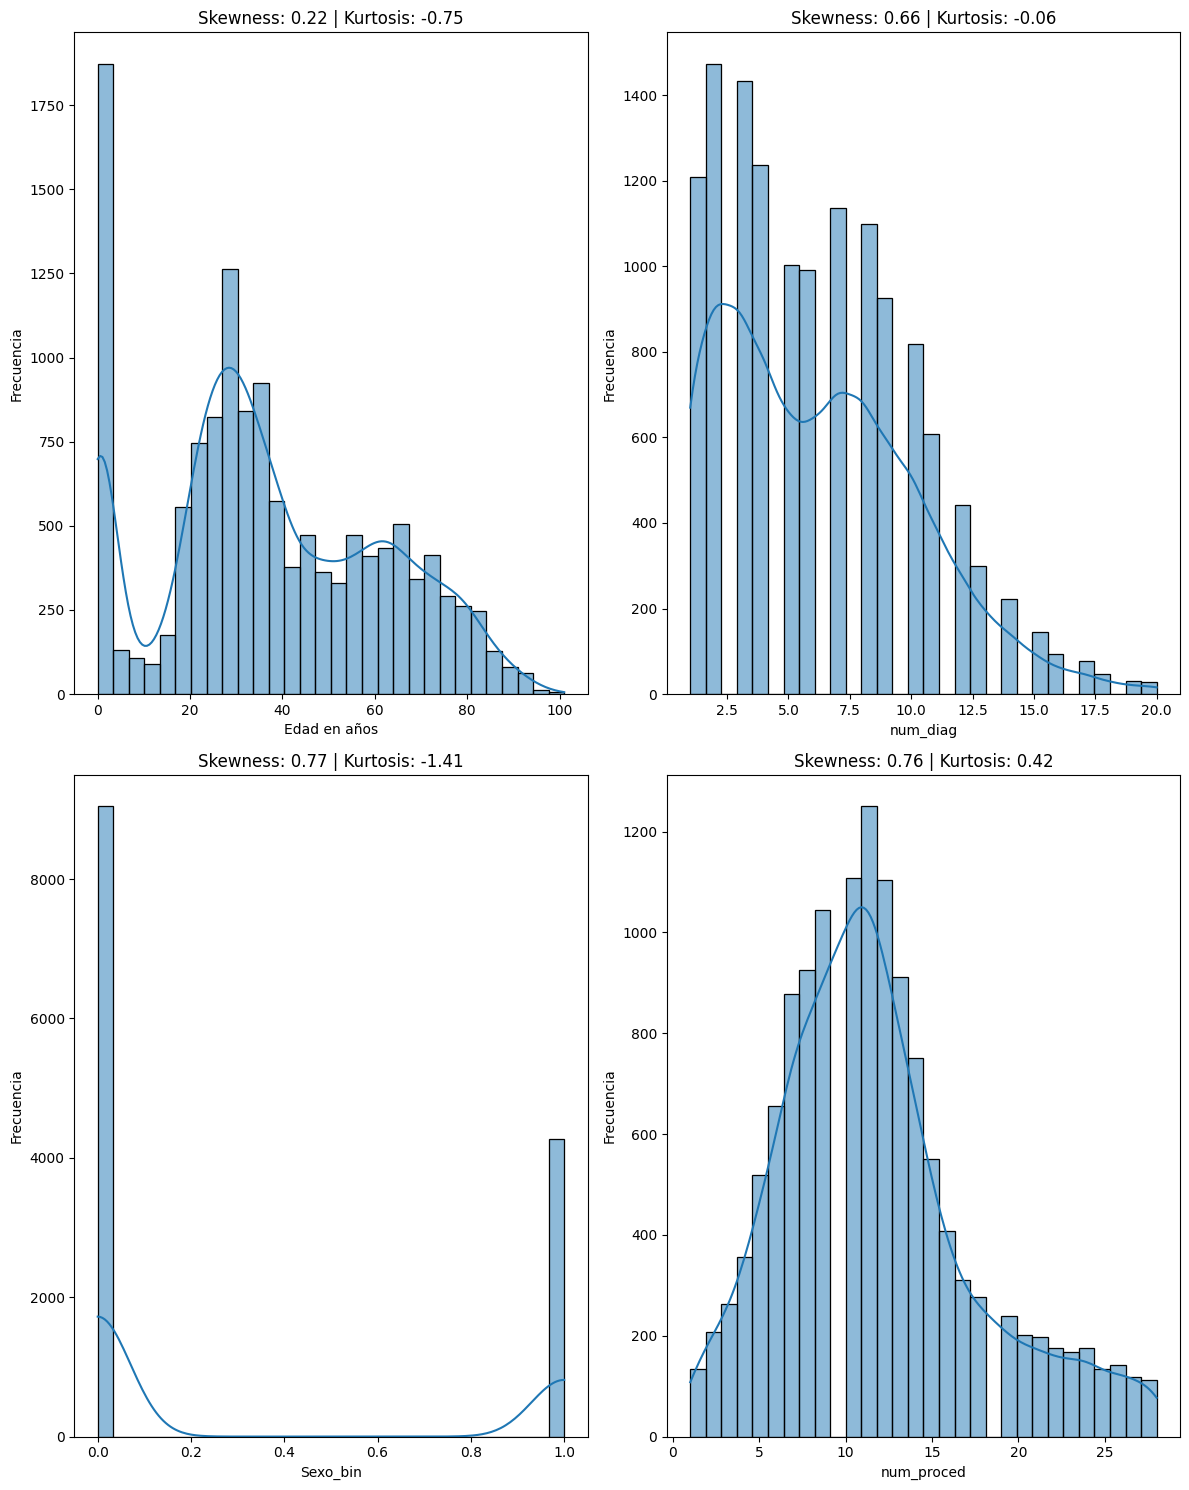

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(12,15))
i=0
j=0
for cosa in cosas:
  sns.histplot(cosa, kde=True, bins=30, ax=axes[i][j])
  axes[i][j].set_title(f"Skewness: {skew(cosa):.2f} | Kurtosis: {kurtosis(cosa, fisher=True):.2f}")
  axes[i][j].set_xlabel(cosa.name)
  axes[i][j].set_ylabel("Frecuencia")
  i+=1
  if i==2:
    i=0
    j+=1

plt.tight_layout()
plt.show()

# Modelos

In [ ]:
from sklearn.preprocessing import label_binarize

df_mod_clean.head()


Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09 Diag10  \
12  F20.6  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN    NaN   
15  I20.0  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10  U07.1   
20  P22.1  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7  Z65.3   
26  D64.8    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5  E11.9   
32  K86.8  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ... Proced27 Proced28 Proced29 Proced30 Edad en años Sexo (Desc)    GRD  \
12  ...      NaN      NaN      NaN      NaN           30       Mujer  19410   
15  ...      NaN      NaN      NaN      NaN           69      Hombre  05420   
20  ...      NaN      NaN      NaN      NaN            0       Mujer  15812   
26  ...     89.7    90.59      NaN      NaN           47       Mujer  16413   
32  ...      NaN      NaN      NaN      NaN           36       Mujer  07412   

   Sexo_bin num_diag num_proced  
12        0        3         19  
15        1       16         24  
20        0       10         24  
26        0       15         28  
32        0        3         24  

[5 rows x 71 columns]

### Agregar nuevas columnas, definir vocabularios y separar datos

In [ ]:
## Creacion de vectores de los diag secundarios y proced secundarios
diag_sec = diag_cols[1:]
proced__sec = proced_cols[1:]
# Columna nueva diag secundarios, [diag02, diag03,...]
# columna nueva proced secundarios

# Creacion de nuevas columnas para los secundarios, una lista con cada diag o proced
df_mod_clean['DiagSecundarios'] = df_mod_clean[diag_sec].apply(lambda row:[x for x in row if not pd.isna(x)], axis=1)
df_mod_clean['ProcedSecundarios'] = df_mod_clean[proced__sec].apply(lambda row:[x for x in row if not pd.isna(x)], axis=1)

df_mod_clean.head()

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09 Diag10  \
12  F20.6  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN    NaN   
15  I20.0  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10  U07.1   
20  P22.1  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7  Z65.3   
26  D64.8    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5  E11.9   
32  K86.8  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ... Proced29 Proced30 Edad en años Sexo (Desc)    GRD Sexo_bin num_diag  \
12  ...      NaN      NaN           30       Mujer  19410        0        3   
15  ...      NaN      NaN           69      Hombre  05420        1       16   
20  ...      NaN      NaN            0       Mujer  15812        0       10   
26  ...      NaN      NaN           47       Mujer  16413        0       15   
32  ...      NaN      NaN           36       Mujer  07412        0        3   

   num_proced                                    DiagSecundarios  \
12         19                                     [F14.2, F10.2]   
15         24  [I25.1, I50.0, I70.20, I65.2, I70.80, I77.8, I...   
20         24  [P28.4, Q21.1, P61.2, P03.4, P02.1, P59.0, P07...   
26         28  [D70, D69.6, N30.8, R31, K72.1, K62.8, C53.9, ...   
32         24                                     [U07.1, Z88.8]   

                                    ProcedSecundarios  
12  [87.44, 88.76, 99.26, 99.29, 90.59, 89.66, 90....  
15  [88.72, 89.52, 88.71, 88.77, 87.44, 90.39, 90....  
20  [88.71, 88.72, 89.50, 88.79, 99.83, 95.11, 95....  
26  [57.32, 45.23, 45.13, 88.01, 87.41, 87.37, 90....  
32  [88.38, 96.59, 99.84, 99.18, 99.19, 99.21, 99....  

[5 rows x 73 columns]

In [ ]:
# Vocabulario CIE9

df_cie9 = pd.read_excel('CIE-9.xlsx', dtype={'Código': str})
X = []
vocabulario_proced = {}
for linea in df_cie9["Código"]:
    if "." in linea:
        text = linea.split(".")
        cod_principal = text[0]
        cod_sub = "." + text[1]
        message = [cod_principal, cod_sub]
        X.append(message)

        for palabra in message:
            vocabulario_proced[palabra] = vocabulario_proced.get(palabra, 0) + 1
    
    else:
        message = [linea]
        X.append(message)
        for palabra in message:
            vocabulario_proced[palabra] = vocabulario_proced.get(palabra, 0) + 1

#print(len(vocabulario))
#print(vocabulario)
print(vocabulario_proced)


{'00': 89, '.0': 99, '.01': 64, '.02': 52, '.03': 39, '.09': 48, '.1': 100, '.10': 17, '.11': 76, '.12': 58, '.13': 41, '.14': 38, '.15': 29, '.16': 26, '.17': 19, '.18': 17, '.19': 62, '.2': 99, '.21': 77, '.22': 67, '.23': 54, '.24': 49, '.25': 39, '.28': 22, '.29': 64, '.3': 98, '.31': 67, '.32': 57, '.33': 43, '.34': 36, '.35': 32, '.39': 56, '.4': 96, '.40': 16, '.41': 67, '.42': 61, '.43': 47, '.44': 34, '.45': 27, '.46': 22, '.47': 15, '.48': 14, '.49': 49, '.5': 90, '.50': 20, '.51': 68, '.52': 57, '.53': 42, '.54': 34, '.55': 27, '.56': 19, '.57': 14, '.58': 11, '.59': 53, '.6': 85, '.60': 15, '.61': 54, '.62': 50, '.63': 43, '.64': 39, '.65': 27, '.66': 23, '.67': 15, '.68': 14, '.69': 40, '.7': 74, '.70': 16, '.71': 61, '.72': 56, '.73': 43, '.74': 35, '.75': 32, '.76': 24, '.77': 14, '.8': 60, '.80': 14, '.81': 47, '.82': 42, '.83': 37, '.84': 34, '.85': 33, '.86': 27, '.87': 20, '.9': 88, '.91': 75, '.92': 66, '.93': 59, '.94': 51, '.95': 46, '01': 40, '.20': 18, '.26': 30

In [53]:
#Vocabulario CIE-10
df_cie10 = pd.read_excel("CIE-10.xlsx")
df_cie10.head()

def asignador(elemento : str, dict):
    elemento = str(elemento)
    if elemento in dict:
        dict[elemento]+=1
    else:
        dict[elemento]=1


vocabulario_diag = {}
for _, codigo in df_cie10['Código'].items():
    letra = codigo[0]
    numeros = codigo[1:]
    if '.' in numeros:
        partes = numeros.split('.')
        partes[-1] = "."+partes[-1]
        for parte in partes:
            asignador(parte, vocabulario_diag)
    else:
        asignador(numeros,vocabulario_diag)
    
    asignador(letra, vocabulario_diag)
    
print(vocabulario_diag)

{'00': 425, 'A': 461, '.0': 1785, '.1': 1680, '.9': 1462, '01': 482, '.2': 1444, '.3': 1231, '.4': 1034, '02': 512, '.8': 1411, '03': 443, '04': 421, '.5': 873, '.6': 713, '.7': 683, '05': 470, '06': 466, '07': 291, '08': 399, '09': 392, '15': 409, '16': 399, '17': 387, '18': 395, '19': 425, '20': 431, '21': 494, '22': 450, '23': 519, '24': 498, '25': 542, '26': 408, '27': 414, '28': 394, '30': 442, '31': 450, '32': 432, '33': 407, '34': 341, '35': 370, '36': 371, '37': 352, '38': 318, '39': 326, '40': 423, '41': 444, '42': 387, '43': 458, '44': 384, '46': 420, '48': 329, '49': 389, '50': 385, '51': 375, '52': 381, '53': 376, '54': 409, '55': 232, '56': 256, '57': 334, '58': 303, '59': 315, '60': 428, '63': 289, '64': 326, '65': 408, '66': 394, '67': 343, '68': 319, '69': 307, '70': 414, '71': 360, '74': 361, '75': 346, '77': 351, '78': 317, '79': 406, '80': 462, '81': 469, '82': 346, '83': 488, '84': 433, '85': 437, '86': 421, '87': 405, '88': 346, '89': 394, '90': 465, '91': 370, '92

In [ ]:
# Separacion en DiagSecundarios, pasar de formato A11.2 a A, 11, .2
for i, lista in df_mod_clean['DiagSecundarios'].items():
    registro_nuevo = []
    for item in lista:
        new_items = []
        letra = item[0]
        numeros = item[1:]
        new_items.append(letra)
        if '.' in numeros:
            partes = numeros.split('.')
            partes[-1] = "."+partes[-1]
            new_items.append(partes[0])
            new_items.append(partes[-1])
        else:
            new_items.append(numeros)
        registro_nuevo.extend(new_items)
    
    df_mod_clean.at[i, 'DiagSecundarios'] = registro_nuevo

df_mod_clean.head()
# No correr 2 veces, ya se corrio esto

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09 Diag10  \
12  F20.6  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN    NaN   
15  I20.0  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10  U07.1   
20  P22.1  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7  Z65.3   
26  D64.8    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5  E11.9   
32  K86.8  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ... Proced29 Proced30 Edad en años Sexo (Desc)    GRD Sexo_bin num_diag  \
12  ...      NaN      NaN           30       Mujer  19410        0        3   
15  ...      NaN      NaN           69      Hombre  05420        1       16   
20  ...      NaN      NaN            0       Mujer  15812        0       10   
26  ...      NaN      NaN           47       Mujer  16413        0       15   
32  ...      NaN      NaN           36       Mujer  07412        0        3   

   num_proced                                    DiagSecundarios  \
12         19                             [F, 14, .2, F, 10, .2]   
15         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios  
12  [87.44, 88.76, 99.26, 99.29, 90.59, 89.66, 90....  
15  [88.72, 89.52, 88.71, 88.77, 87.44, 90.39, 90....  
20  [88.71, 88.72, 89.50, 88.79, 99.83, 95.11, 95....  
26  [57.32, 45.23, 45.13, 88.01, 87.41, 87.37, 90....  
32  [88.38, 96.59, 99.84, 99.18, 99.19, 99.21, 99....  

[5 rows x 73 columns]

In [ ]:
# Separacion en ProcedSecundarios, pasar de formato 11.22 a 11, .22

for i, linea in df_mod_clean["ProcedSecundarios"].items():
    message = []
    for codigo in linea:
        text = codigo.split(".")
        cod_principal = text[0]
        cod_sub = "." + text[1]
        message.append(cod_principal)
        message.append(cod_sub)
    df_mod_clean.at[i, 'ProcedSecundarios'] = message

df_mod_clean.head()
# No correr 2 veces, ya se corrio esto
        

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09 Diag10  \
12  F20.6  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN    NaN   
15  I20.0  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10  U07.1   
20  P22.1  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7  Z65.3   
26  D64.8    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5  E11.9   
32  K86.8  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ... Proced29 Proced30 Edad en años Sexo (Desc)    GRD Sexo_bin num_diag  \
12  ...      NaN      NaN           30       Mujer  19410        0        3   
15  ...      NaN      NaN           69      Hombre  05420        1       16   
20  ...      NaN      NaN            0       Mujer  15812        0       10   
26  ...      NaN      NaN           47       Mujer  16413        0       15   
32  ...      NaN      NaN           36       Mujer  07412        0        3   

   num_proced                                    DiagSecundarios  \
12         19                             [F, 14, .2, F, 10, .2]   
15         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios  
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...  
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...  
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...  
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  

[5 rows x 73 columns]

### Tokenizar vocabulario, diag secundarios, proced segundarios, diag01 y proced01

In [ ]:
# Importaciones importantes
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf

In [ ]:
# Copia del df utilizado, incluyendo las versiones token de ciertas columnas
df_mod_clean_token = df_mod_clean.copy()

In [ ]:
# Vocabularios finales pero en tokens, este es el de diag

# Ordenamos por frecuencia
tokens_ordenados_diag = sorted(vocabulario_diag.items(), key=lambda x: x[1], reverse=True)

# Asignamos índices (desde 2, porque 0 = padding, 1 = <OOV>)
vocabulario_final_diag = {token: idx+2 for idx, (token, _) in enumerate(tokens_ordenados_diag)}

# Agregamos manualmente padding y OOV
vocabulario_final_diag['<PAD>'] = 0
vocabulario_final_diag['<OOV>'] = 1

print(vocabulario_final_diag)

{'X': 2, 'W': 3, 'V': 4, 'M': 5, 'Y': 6, '.0': 7, '.1': 8, '.9': 9, '.2': 10, '.8': 11, '.3': 12, '.4': 13, 'S': 14, '.5': 15, 'T': 16, '.6': 17, 'Z': 18, 'Q': 19, '.7': 20, '25': 21, 'C': 22, 'D': 23, '23': 24, '02': 25, 'N': 26, 'K': 27, 'O': 28, '24': 29, '21': 30, '12': 31, '83': 32, '10': 33, '01': 34, '11': 35, '13': 36, '05': 37, '81': 38, 'F': 39, 'I': 40, '06': 41, '90': 42, '80': 43, 'A': 44, '43': 45, 'B': 46, '22': 47, '31': 48, '41': 49, '03': 50, '30': 51, 'H': 52, '85': 53, '84': 54, '32': 55, '20': 56, '60': 57, '00': 58, '19': 59, '40': 60, '04': 61, '86': 62, '46': 63, '27': 64, '70': 65, 'E': 66, '15': 67, '54': 68, '26': 69, '65': 70, '33': 71, '79': 72, '87': 73, '14': 74, '08': 75, '16': 76, 'L': 77, '29': 78, 'R': 79, '18': 80, '94': 81, '28': 82, '66': 83, '89': 84, '09': 85, '49': 86, 'G': 87, '17': 88, '42': 89, 'P': 90, '50': 91, '44': 92, '92': 93, '.00': 94, '52': 95, '.01': 96, '.10': 97, '.11': 98, '53': 99, '51': 100, '62': 101, '.09': 102, '36': 103, '.

In [ ]:
# Vocabulario final de procedimientos en token
tokens_ordenados_proced = sorted(vocabulario_proced.items(), key=lambda x: x[1], reverse=True)

# Asignamos índices (desde 2, porque 0 = padding, 1 = <OOV>)
vocabulario_final_proced = {token: idx+2 for idx, (token, _) in enumerate(tokens_ordenados_proced)}

# Agregamos manualmente padding y OOV 
vocabulario_final_proced['<PAD>'] = 0
vocabulario_final_proced['<OOV>'] = 1

print(vocabulario_final_proced)

{'77': 2, '78': 3, '79': 4, '.1': 5, '.0': 6, '.2': 7, '.3': 8, '99': 9, '80': 10, '.4': 11, '88': 12, '93': 13, '38': 14, '81': 15, '.5': 16, '00': 17, '.9': 18, '.6': 19, '84': 20, '90': 21, '91': 22, '87': 23, '.21': 24, '.11': 25, '.91': 26, '37': 27, '.7': 28, '89': 29, '.99': 30, '39': 31, '35': 32, '97': 33, '.51': 34, '.22': 35, '.31': 36, '.41': 37, '.92': 38, '12': 39, '51': 40, '.01': 41, '.29': 42, '86': 43, '96': 44, '82': 45, '85': 46, '.19': 47, '45': 48, '83': 49, '.42': 50, '.71': 51, '.8': 52, '08': 53, '46': 54, '.93': 55, '.12': 56, '07': 57, '.32': 58, '.52': 59, '42': 60, '.39': 61, '.72': 62, '94': 63, '.23': 64, '.61': 65, '.59': 66, '.02': 67, '48': 68, '.94': 69, '55': 70, '65': 71, '.62': 72, '44': 73, '.24': 74, '.49': 75, '76': 76, '.09': 77, '.43': 78, '.81': 79, '53': 80, '57': 81, '70': 82, '.95': 83, '34': 84, '49': 85, '.79': 86, '.33': 87, '.63': 88, '.73': 89, '14': 90, '16': 91, '33': 92, '56': 93, '.53': 94, '.82': 95, '17': 96, '21': 97, '.13': 98

In [60]:
df_mod_clean['ProcedSecundarios']

12       [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...
15       [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...
20       [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...
26       [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...
32       [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...
35       [89, .7, 90, .59, 99, .26, 94, .42, 93, .89, 9...
36       [99, .26, 94, .49, 94, .44, 94, .39, 94, .49, ...
38       [57, .94, 88, .78, 75, .34, 90, .59, 91, .39, ...
42       [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...
45       [90, .09, 90, .59, 88, .72, 88, .71, 88, .33, ...
47       [89, .14, 88, .91, 94, .19, 94, .22, 94, .39, ...
48       [87, .44, 88, .72, 89, .52, 88, .71, 89, .65, ...
49       [86, .28, 91, .83, 90, .59, 90, .39, 99, .21, ...
53       [51, .10, 51, .85, 51, .88, 88, .01, 88, .38, ...
54       [96, .04, 42, .33, 87, .41, 87, .03, 88, .01, ...
55       [88, .72, 89, .52, 87, .44, 90, .59, 89, .66, ...
59       [90, .59, 91, .39, 89, .03, 94, .44, 94, .13, .

In [ ]:
## Tokenizando los diagnosticos secundarios del formato A, 11, .2 a sus tokens correspondientes
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

diag_as_text = [' '.join(seq) for seq in df_mod_clean['DiagSecundarios']]

# Creamos el tokenizer
tokenizer_diag = Tokenizer(oov_token='<OOV>')
tokenizer_diag.fit_on_texts(vocabulario_final_diag)

# Convertimos a secuencias numéricas
sequences_diag = tokenizer_diag.texts_to_sequences(diag_as_text)

# Padding para igualar longitudes
padded_sequences_diag = pad_sequences(sequences_diag, padding='post')

print(padded_sequences_diag)
print(len(padded_sequences_diag))
print(padded_sequences_diag[0])

[[469 193   6 ...   0   0   0]
 [470 151   5 ...   0   0   0]
 [478 199 457 ...   0   0   0]
 ...
 [451 197 154 ...   0   0   0]
 [470 158 474 ...   0   0   0]
 [470 158 461 ...   0   0   0]]
13316
[469 193   6 469 158   6   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [ ]:
## Tokenizando los procedmientis secundarios del formato 11, .22 a sus tokens correspondientes

proced_as_text = [' '.join(seq) for seq in df_mod_clean['ProcedSecundarios']]

# Creamos el tokenizer
tokenizer_proced = Tokenizer(oov_token='<OOV>')
tokenizer_proced.fit_on_texts(vocabulario_final_proced)

# Convertimos a secuencias numéricas
sequences_proced = tokenizer_proced.texts_to_sequences(proced_as_text)

# Padding para igualar longitudes
padded_sequences_proced = pad_sequences(sequences_proced, padding='post')

print(padded_sequences_proced)
print(len(padded_sequences_proced))

[[15 55  7 ...  0  0  0]
 [ 7 45 19 ...  0  0  0]
 [ 7 39  7 ...  0  0  0]
 ...
 [19 44  5 ...  0  0  0]
 [ 5 96  5 ...  0  0  0]
 [13 49  5 ...  0  0  0]]
13316


In [ ]:
# Diagnostico principal en formato A, 11, .2
for i, item in df_mod_clean['Diag01'].items():
    registro_nuevo = []
    letra = item[0]
    numeros = item[1:]
    registro_nuevo.append(letra)
    if '.' in numeros:
        partes = numeros.split('.')
        partes[-1] = "."+partes[-1]
        registro_nuevo.append(partes[0])
        registro_nuevo.append(partes[-1])
    else:
        registro_nuevo.append(numeros)
    
    df_mod_clean_token.at[i, 'Diag01'] = registro_nuevo

    print(registro_nuevo)
# No hacerlo 2 veces, ya se realizo

df_mod_clean_token.head()

['F', '20', '.6']
['I', '20', '.0']
['P', '22', '.1']
['D', '64', '.8']
['K', '86', '.8']
['F', '19', '.2']
['G', '40', '.9']
['O', '32', '.1']
['I', '20', '.0']
['A', '50', '.1']
['F', '29']
['P', '22', '.1']
['T', '81', '.3']
['K', '80', '.8']
['U', '07', '.1']
['I', '47', '.1']
['F', '20', '.0']
['K', '83', '.0']
['K', '85', '.1']
['I', '83', '.2']
['K', '85', '.1']
['N', '18', '.5']
['L', '03', '.0']
['I', '50', '.1']
['N', '40']
['K', '85', '.9']
['F', '32', '.2']
['I', '50', '.9']
['E', '11', '.7']
['K', '92', '.2']
['K', '85', '.1']
['I', '20', '.0']
['K', '70', '.4']
['I', '63', '.8']
['O', '21', '.2']
['R', '00', '.1']
['E', '11', '.5']
['U', '07', '.1']
['O', '34', '.3']
['P', '22', '.1']
['P', '23', '.9']
['P', '22', '.8']
['F', '31', '.6']
['O', '61', '.0']
['E', '11', '.1']
['U', '07', '.1']
['I', '21', '.0']
['K', '83', '.1']
['T', '81', '.4']
['C', '20']
['J', '69', '.0']
['O', '34', '.2']
['P', '22', '.8']
['C', '34', '.9']
['N', '13', '.2']
['O', '14', '.9']
['O', '23'

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09  \
12  [F, 20, .6]  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN   
15  [I, 20, .0]  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10   
20  [P, 22, .1]  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7   
26  [D, 64, .8]    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5   
32  [K, 86, .8]  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN   

   Diag10  ... Proced29 Proced30 Edad en años Sexo (Desc)    GRD Sexo_bin  \
12    NaN  ...      NaN      NaN           30       Mujer  19410        0   
15  U07.1  ...      NaN      NaN           69      Hombre  05420        1   
20  Z65.3  ...      NaN      NaN            0       Mujer  15812        0   
26  E11.9  ...      NaN      NaN           47       Mujer  16413        0   
32    NaN  ...      NaN      NaN           36       Mujer  07412        0   

   num_diag num_proced                                    DiagSecundarios  \
12        3         19                             [F, 14, .2, F, 10, .2]   
15       16         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20       10         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26       15         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32        3         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios  
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...  
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...  
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...  
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  

[5 rows x 73 columns]

In [64]:
# Proced principal en formato 11, .22
for i, codigo in df_mod_clean["Proced01"].items():
    message = []
    text = codigo.split(".")
    cod_principal = text[0]
    cod_sub = "." + text[1]
    message.append(cod_principal)
    message.append(cod_sub)
    print(message)
    df_mod_clean_token.at[i, 'Proced01'] = message

# Ya se realizo, no ejecutar otra vez

['94', '.19']
['87', '.41']
['87', '.44']
['99', '.04']
['88', '.01']
['94', '.11']
['87', '.03']
['74', '.1']
['87', '.41']
['03', '.31']
['87', '.03']
['93', '.90']
['86', '.75']
['51', '.23']
['96', '.72']
['89', '.50']
['89', '.52']
['51', '.10']
['88', '.47']
['84', '.17']
['51', '.23']
['87', '.71']
['84', '.11']
['87', '.41']
['60', '.29']
['88', '.01']
['99', '.26']
['88', '.72']
['88', '.65']
['45', '.13']
['89', '.7']
['89', '.50']
['45', '.13']
['87', '.03']
['89', '.26']
['87', '.44']
['84', '.15']
['87', '.41']
['88', '.78']
['93', '.90']
['96', '.71']
['93', '.90']
['94', '.19']
['74', '.1']
['87', '.44']
['93', '.90']
['88', '.72']
['51', '.10']
['86', '.28']
['46', '.03']
['43', '.11']
['74', '.1']
['87', '.44']
['96', '.6']
['57', '.32']
['88', '.78']
['91', '.33']
['88', '.43']
['86', '.22']
['60', '.3']
['86', '.28']
['68', '.49']
['52', '.7']
['87', '.03']
['56', '.2']
['88', '.01']
['73', '.59']
['84', '.15']
['73', '.59']
['99', '.69']
['47', '.09']
['73', '.59']


In [65]:
# Diag01 y proced 01 en forma de tokens, lo mismo que se hizo con los secundarios
diag01_as_text = [' '.join(seq) for seq in df_mod_clean_token['Diag01']]
# Ya tenemos el tokenizer configurado de antes
sequences_diag01 = tokenizer_diag.texts_to_sequences(diag01_as_text)
padded_sequences_diag01 = pad_sequences(sequences_diag01, padding='post')

print(padded_sequences_diag01)
print(len(padded_sequences_diag01))

proced01_as_text = [' '.join(seq) for seq in df_mod_clean_token['Proced01']]


sequences_proced01 = tokenizer_proced.texts_to_sequences(proced01_as_text)
padded_sequences_proced01 = pad_sequences(sequences_proced01, padding='post')

print(padded_sequences_proced01)
print(len(padded_sequences_proced01))

[[469 176   3]
 [470 176   4]
 [478 168   5]
 ...
 [458 202 455]
 [467 208   5]
 [474 241   5]]
13316
[[ 46  35]
 [ 15  26]
 [ 15  55]
 ...
 [ 15  78]
 [ 19  65]
 [ 19 110]]
13316


### Agregando los tokens como columnas

In [66]:
#Agregar  los nuevos proced y diag en token como columnas
df_mod_clean_token['Diag01Token'] = list(padded_sequences_diag01)
df_mod_clean_token['Proced01Token'] = list(padded_sequences_proced01)

In [67]:
df_mod_clean_token['DiagSecundariosToken'] = list(padded_sequences_diag)
df_mod_clean_token['ProcedSecundariosToken'] = list(padded_sequences_proced)

In [68]:
df_mod_clean_token.head()

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09  \
12  [F, 20, .6]  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN   
15  [I, 20, .0]  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10   
20  [P, 22, .1]  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7   
26  [D, 64, .8]    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5   
32  [K, 86, .8]  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN   

   Diag10  ...    GRD Sexo_bin num_diag num_proced  \
12    NaN  ...  19410        0        3         19   
15  U07.1  ...  05420        1       16         24   
20  Z65.3  ...  15812        0       10         24   
26  E11.9  ...  16413        0       15         28   
32    NaN  ...  07412        0        3         24   

                                      DiagSecundarios  \
12                             [F, 14, .2, F, 10, .2]   
15  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios      Diag01Token  \
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...    [469, 176, 3]   
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...    [470, 176, 4]   
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...    [478, 168, 5]   
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  [465, 238, 456]   
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  [467, 182, 456]   

   Proced01Token                               DiagSecundariosToken  \
12      [46, 35]  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15      [15, 26]  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20      [15, 55]  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26       [5, 76]  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32       [7, 29]  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                               ProcedSecundariosToken  
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...  
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...  
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...  
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...  
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...  

[5 rows x 77 columns]

In [69]:
import keras
from keras import layers
from keras import initializers
keras.utils.set_random_seed(812)

## Red Neuronal Estandar con Embeddings
En este modelo, se usa una red estandar con los embedding para los diagnosticos y procediminetos

In [70]:
## Creacion de la red neuronal  en si
from keras.models import Model
from keras.layers import Input, Embedding, Dense, Flatten, Concatenate


# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced01)

## Estos flatten sirven para utilizar las capas densas estandar, ya que requieren vectores 1D como input
# estos eliminan a los 0 del embedding, entonces no es necesario poner mask_zero= True
#con lstm o gru son necesarios
#embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=true)(input_diag)
flat_diag = Flatten()(embedding_diag)
flat_proced = Flatten()(embedding_proced)
flat_diag01 = Flatten()(embedding_diag01)
flat_proced01 = Flatten()(embedding_proced01)
# Junta todo en un solo vector magico
concatenado = Concatenate()([flat_diag, flat_proced, flat_diag01, flat_proced01, input_edad, input_sexo])
# Neuronas
densa = Dense(64, activation='relu')(concatenado)
for _ in range(2):
    densa = Dense(64, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(densa)

modelo_test = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_test.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_test.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3584)      │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3456)      │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 192)       │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 128)       │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_sexo          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 7362)      │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ input_edad[0][0], │
│                     │                   │            │ input_sexo[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    471,232 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 698,317 (2.66 MB)

 Trainable params: 698,317 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

### Preparacion x e y

In [71]:
#Seleccion de los datos de entrada y prediccion
# X = df_mod_clean_token.drop(["GRD"], axis=1)
dummy = df_mod_clean_token.copy()
X = dummy[['DiagSecundariosToken', 'ProcedSecundariosToken','Diag01Token','Proced01Token','Edad en años', 'Sexo_bin']]
y = df_mod_clean_token["GRD"]

# Binarizar las clases
y_bins = label_binarize(y, classes = sorted(y.unique()))
print(y_bins)
X.head()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


DiagSecundariosToken  \
12  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                               ProcedSecundariosToken      Diag01Token  \
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...    [469, 176, 3]   
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...    [470, 176, 4]   
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...    [478, 168, 5]   
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...  [465, 238, 456]   
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...  [467, 182, 456]   

   Proced01Token  Edad en años  Sexo_bin  
12      [46, 35]            30         0  
15      [15, 26]            69         1  
20      [15, 55]             0         0  
26       [5, 76]            47         0  
32       [7, 29]            36         0

In [72]:
# Division en train y test y reformulacion de nombre para facilitar entrenamineto
# Cambiando nombres
X.rename(columns={
    'DiagSecundariosToken': 'diag',
    'ProcedSecundariosToken' : 'proced',
    'Diag01Token': 'diag01',
    'Proced01Token': 'proced01',
    'Edad en años': 'edad',
    'Sexo_bin': 'sexo',
    }, inplace=True)
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=42)

# Diccionarios para el fit del modelo
input_train_dict = {}
for col in X_train:
    nombre = 'input_'+col
    input_train = np.array(X_train[col].tolist(), dtype=np.int32)
    input_train_dict[nombre]=input_train    

input_test_dict = {}
for col in X_test:
    nombre = 'input_'+col
    input_test= np.array(X_test[col].tolist(), dtype=np.int32)
    input_test_dict[nombre]=input_test   


C:\Users\Francisco\AppData\Local\Temp\ipykernel_5064\1385486757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


In [73]:
input_train_dict

{'input_diag': array([[  0,   0,   0, ...,   0,   0,   0],
        [479, 156, 456, ...,   0,   0,   0],
        [478, 162,   5, ...,   0,   0,   0],
        ...,
        [468, 166,   4, ...,   0,   0,   0],
        [470, 220,   3, ...,   0,   0,   0],
        [476, 177,   5, ...,   0,   0,   0]]),
 'input_proced': array([[  7,  29,   5, ...,   0,   0,   0],
        [  5,  12,   8, ...,   0,   0,   0],
        [ 13,  44,  13, ...,   0,   0,   0],
        ...,
        [ 86,  75,  86, ...,   0,   0,   0],
        [  7, 100,   7, ...,   0,   0,   0],
        [  7,  29,   7, ...,   0,   0,   0]]),
 'input_diag01': array([[467, 229,   4],
        [480, 244,   5],
        [478, 230, 455],
        ...,
        [468, 185,   4],
        [470, 220,   4],
        [470, 206,   5]]),
 'input_proced01': array([[57,  8],
        [15, 55],
        [ 5, 16],
        ...,
        [68, 49],
        [ 7, 55],
        [ 7, 60]]),
 'input_edad': array([24, 69,  0, ..., 24, 69, 71]),
 'input_sexo': array([0, 

In [74]:
X.head()

diag  \
12  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                                               proced           diag01  \
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...    [469, 176, 3]   
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...    [470, 176, 4]   
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...    [478, 168, 5]   
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...  [465, 238, 456]   
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...  [467, 182, 456]   

    proced01  edad  sexo  
12  [46, 35]    30     0  
15  [15, 26]    69     1  
20  [15, 55]     0     0  
26   [5, 76]    47     0  
32   [7, 29]    36     0

### Entrenando modelo

In [75]:
# Entrenando el modelo
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True,)
history_dense = modelo_test.fit(x=input_train_dict, 
                y=y_train, 
                validation_data=(input_test_dict,y_test), 
                batch_size=64, epochs=128, callbacks=[early_stop])



Epoch 1/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2126 - loss: 4.0547 - val_accuracy: 0.5612 - val_loss: 2.1912
Epoch 2/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 1.7768 - val_accuracy: 0.7147 - val_loss: 1.2832
Epoch 3/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7776 - loss: 1.0144 - val_accuracy: 0.7725 - val_loss: 1.0084
Epoch 4/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8352 - loss: 0.7102 - val_accuracy: 0.7962 - val_loss: 0.9132
Epoch 5/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.5371 - val_accuracy: 0.8104 - val_loss: 0.8814
Epoch 6/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.4164 - val_accuracy: 0.8198 - val_loss: 0.8510
Epoch 7/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.3251 - val_accuracy: 0.8206 - val_loss: 0.8736
Epoch 8/128
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9362 - loss: 0.2471 - val_accu

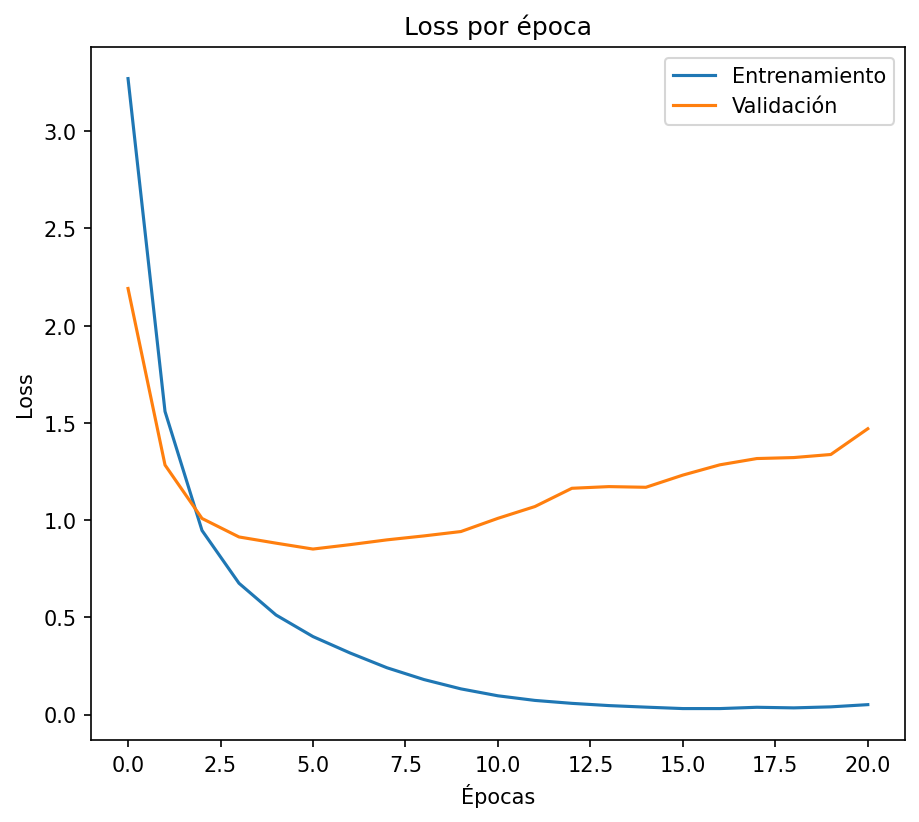

{'accuracy': [0.33805859088897705, 0.6648516654968262, 0.7905557751655579, 0.8409688472747803, 0.8744836449623108, 0.8971084952354431, 0.9189823269844055, 0.9373826384544373, 0.9537175893783569, 0.9680811166763306, 0.97906494140625, 0.9849793314933777, 0.9888283610343933, 0.9908937215805054, 0.9924896955490112, 0.9933345913887024, 0.99239581823349, 0.9905182123184204, 0.991926372051239, 0.9890161752700806, 0.9849793314933777], 'loss': [3.270772933959961, 1.5586707592010498, 0.9466010332107544, 0.6750829815864563, 0.5118984580039978, 0.4008422791957855, 0.31671127676963806, 0.24049094319343567, 0.17979411780834198, 0.13181716203689575, 0.09623169898986816, 0.07249017804861069, 0.05735402926802635, 0.0459086149930954, 0.03790612891316414, 0.03052944503724575, 0.030476093292236328, 0.03716784715652466, 0.03411377593874931, 0.03934745863080025, 0.050748441368341446], 'val_accuracy': [0.5611861944198608, 0.7147147059440613, 0.772522509098053, 0.7961711883544922, 0.81043541431427, 0.81981980

In [76]:
plt.figure(figsize=(7, 6), dpi=150)
plt.plot(history_dense.history['loss'], label='Entrenamiento')
plt.plot(history_dense.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_dense.history)

In [77]:
# Predicciones, estos ya son vectores con problabilidades
y_pred_probs = modelo_test.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [78]:
import numpy as np

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8198198198198198
0.42587541866048223
0.4322065981724374
0.41002225131003267


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8198198198198198
0.8075761427489271
0.8198198198198198
0.8030944141004854


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU
Similar a lo anterior, pero usando GRU esta vez

### Modelo

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

gru_diag = Bidirectional(GRU(64))(embedding_diag)
gru_proced = Bidirectional(GRU(64))(embedding_proced)
gru_diag01 = Bidirectional(GRU(64))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(64))(embedding_proced01)
# Junta todo en un solo vector magico
concatenado = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])


#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(concatenado)

modelo_gru = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_gru.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_gru.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_3         │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     49,920 │ embedding_4[0][0… │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │     49,920 │ embedding_5[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 128)       │     49,920 │ embedding_6[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 128)       │     49,920 │ embedding_7[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 510,695 (1.95 MB)

 Trainable params: 510,695 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento 

In [81]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_gru = modelo_gru.fit(x=input_train_dict, 
                y=y_train, 
                validation_data=(input_test_dict,y_test), 
                batch_size=64, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2426 - loss: 4.4538 - val_accuracy: 0.7162 - val_loss: 1.3817
Epoch 2/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7693 - loss: 1.0903 - val_accuracy: 0.8273 - val_loss: 0.8118
Epoch 3/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8583 - loss: 0.6236 - val_accuracy: 0.8521 - val_loss: 0.6534
Epoch 4/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8946 - loss: 0.4416 - val_accuracy: 0.8720 - val_loss: 0.5757
Epoch 5/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9188 - loss: 0.3302 - val_accuracy: 0.8840 - val_loss: 0.5299
Epoch 6/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9382 - loss: 0.2546 - val_accuracy: 0.8911 - val_loss: 0.5092
Epoch 7/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9527 - loss: 0.1998 - val_accuracy: 0.8971 - val_loss: 0.4939
Epoch 8/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9624 - loss: 0.1568 - val_acc

### Loss / Eval Loss

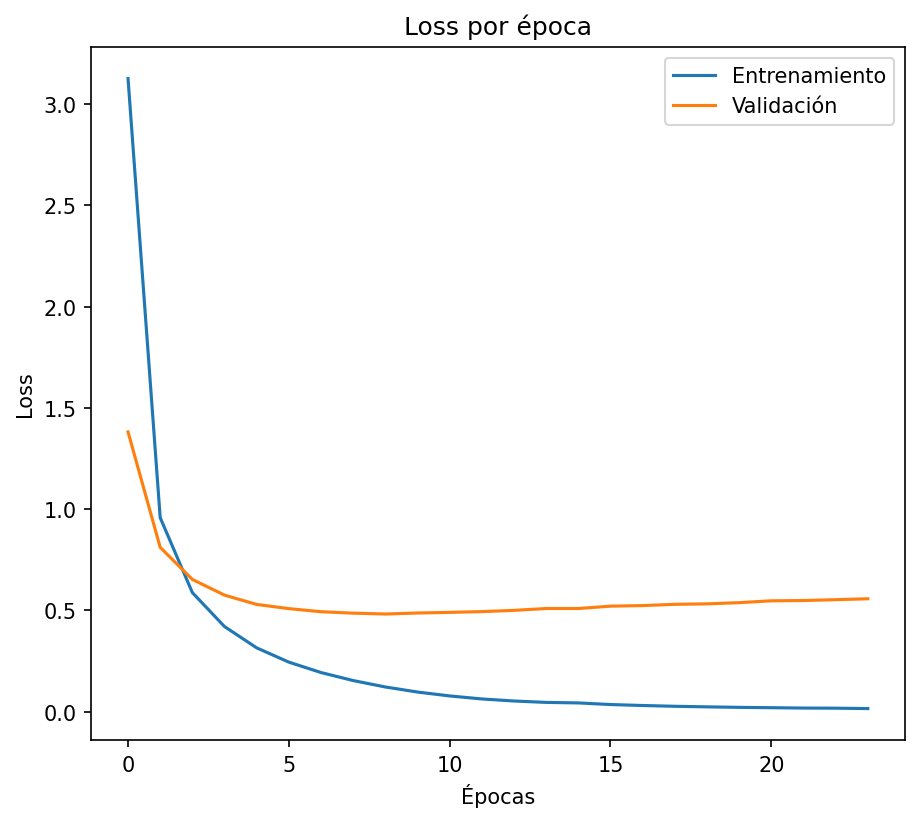

{'accuracy': [0.42977845668792725, 0.7927149534225464, 0.8638753294944763, 0.8988922238349915, 0.9222680926322937, 0.940480649471283, 0.9534359574317932, 0.9631993770599365, 0.9713668823242188, 0.9781261682510376, 0.9833834171295166, 0.987514078617096, 0.9894855618476868, 0.9905182123184204, 0.9894855618476868, 0.9923019409179688, 0.9933345913887024, 0.9942733645439148, 0.9948366284370422, 0.9952121376991272, 0.9955877065658569, 0.9961509704589844, 0.9960570931434631, 0.9963387250900269], 'loss': [3.1266541481018066, 0.9584150314331055, 0.5882806777954102, 0.42051512002944946, 0.3154548406600952, 0.24493643641471863, 0.1936129629611969, 0.15396295487880707, 0.1222614198923111, 0.0972132459282875, 0.07803545147180557, 0.0631592646241188, 0.05300484970211983, 0.04609481990337372, 0.043569181114435196, 0.035545703023672104, 0.030805908143520355, 0.026925133541226387, 0.024082431569695473, 0.021659357473254204, 0.0199381485581398, 0.018162989988923073, 0.01754605956375599, 0.01558141410350

In [82]:
plt.figure(figsize=(7, 6), dpi=150) 
plt.plot(history_gru.history['loss'], label='Entrenamiento')
plt.plot(history_gru.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_gru.history)

### Accuracy/Precicion/Recall/f1

In [83]:
y_pred_probs_gru = modelo_gru.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [84]:
import numpy as np

y_pred_classes = np.argmax(y_pred_probs_gru, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9039039039039038
0.6856613688232438
0.6621386553384333
0.6595635865365496


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9039039039039038
0.8964067451333863
0.9039039039039038
0.8952480717623251


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LSTM
GRU mas caro

### Modelo

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

lstm_diag = Bidirectional(LSTM(128))(embedding_diag)
lstm_proced = Bidirectional(LSTM(128))(embedding_proced)
lstm_diag01 = Bidirectional(LSTM(128))(embedding_diag01)
lstm_proced01 = Bidirectional(LSTM(128))(embedding_proced01)
# Junta todo en un solo vector magico

concatenado = Concatenate()([lstm_diag, lstm_proced, lstm_diag01, lstm_proced01, input_edad, input_sexo])


#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(concatenado)

modelo_lstm = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_lstm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_lstm.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_4         │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_5         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_7         │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 256)       │    197,632 │ embedding_8[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_5     │ (None, 256)       │    197,632 │ embedding_9[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 256)       │    197,632 │ embedding_10[0][… │
│ (Bidirectional)     │                   │            │ not_equal_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 256)       │    197,632 │ embedding_11[0][… │
│ (Bidirectional)     │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 1,206,503 (4.60 MB)

 Trainable params: 1,206,503 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento


In [87]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = modelo_lstm.fit(x=input_train_dict, 
                y=y_train, 
                validation_data=(input_test_dict,y_test), 
                batch_size=64, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.2512 - loss: 4.1309 - val_accuracy: 0.7290 - val_loss: 1.2415
Epoch 2/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.7818 - loss: 0.9811 - val_accuracy: 0.8348 - val_loss: 0.7766
Epoch 3/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.8628 - loss: 0.5840 - val_accuracy: 0.8600 - val_loss: 0.6476
Epoch 4/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.8968 - loss: 0.4212 - val_accuracy: 0.8758 - val_loss: 0.5846
Epoch 5/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9213 - loss: 0.3210 - val_accuracy: 0.8836 - val_loss: 0.5514
Epoch 6/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9374 - loss: 0.2504 - val_accuracy: 0.8896 - val_loss: 0.5484
Epoch 7/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9463 - loss: 0.1968 - val_accuracy: 0.8893 - val_loss: 0.5460
Epoch 8/64
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.9577 - loss: 0.1575 - val_acc

### Loss/ Val Loss

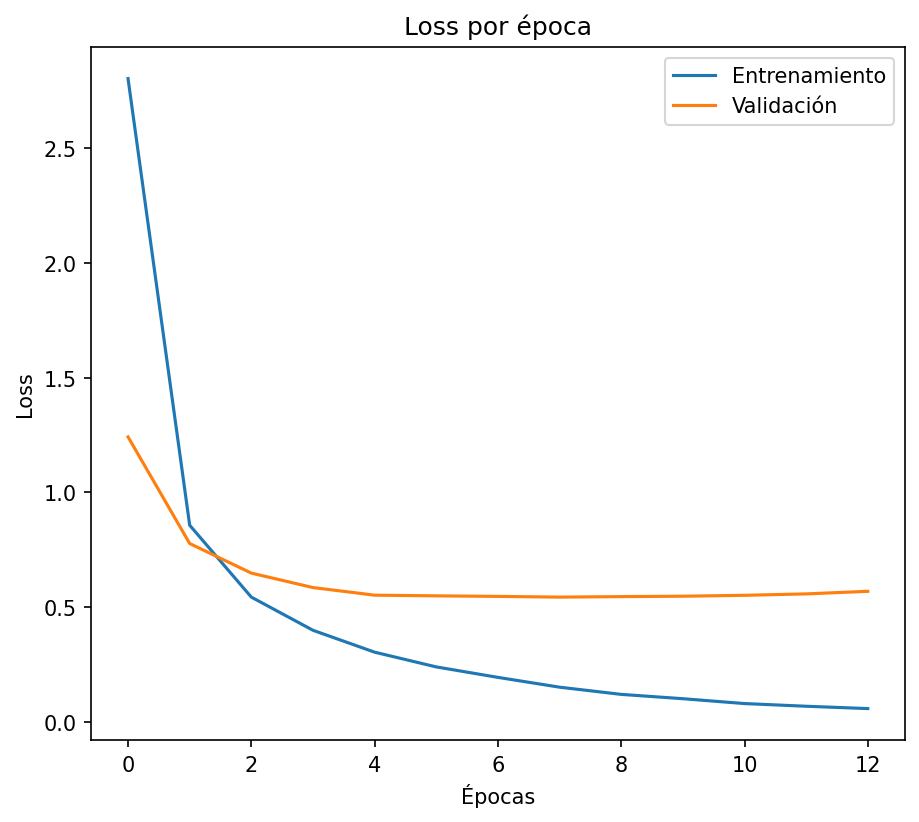

{'accuracy': [0.4483664929866791, 0.8092377185821533, 0.8710101246833801, 0.9016147255897522, 0.9248967170715332, 0.9402928948402405, 0.9488359093666077, 0.9611340761184692, 0.9704281091690063, 0.9738077521324158, 0.9804731607437134, 0.9831017851829529, 0.9860120415687561], 'loss': [2.8036587238311768, 0.8564268946647644, 0.5429096817970276, 0.3983050286769867, 0.3028731942176819, 0.2386063188314438, 0.19297011196613312, 0.1502297818660736, 0.11882925033569336, 0.09997845441102982, 0.07879363745450974, 0.06711211055517197, 0.05692800506949425], 'val_accuracy': [0.7289789915084839, 0.8348348140716553, 0.8599849939346313, 0.8757507801055908, 0.8836336135864258, 0.8896396160125732, 0.8892642855644226, 0.8933933973312378, 0.8960210084915161, 0.8941441178321838, 0.892642617225647, 0.8963963985443115, 0.8960210084915161], 'val_loss': [1.241526484489441, 0.7765543460845947, 0.6475877165794373, 0.5845694541931152, 0.5513595938682556, 0.5484427809715271, 0.5460404753684998, 0.5429137349128723, 

In [88]:
plt.figure(figsize=(7, 6), dpi=150) 
plt.plot(history_lstm.history['loss'], label='Entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Validación')
plt.title('Loss por época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history_lstm.history)

### Accuracy/Precision/Recall/f1

In [89]:
y_pred_probs_lstm = modelo_lstm.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [90]:

y_pred_classes = np.argmax(y_pred_probs_lstm, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8933933933933934
0.6329421062654312
0.6371464601456137
0.6180670152621511


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8933933933933934
0.8884426645149087
0.8933933933933934
0.8848321241764431


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU + Denso
Basicamente iniciando con gru para despues tener unas capas estandar

### Modelo

In [92]:
from keras.models import Model
from keras.layers import Input, Embedding, Dense, GRU, LSTM, Concatenate, Bidirectional
from keras.layers import Masking
# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64, mask_zero=True)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64, mask_zero=True)(input_proced01)

gru_diag = Bidirectional(GRU(128))(embedding_diag)
gru_proced = Bidirectional(GRU(128))(embedding_proced)
gru_diag01 = Bidirectional(GRU(128))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(128))(embedding_proced01)
# Junta todo en un solo vector magico


concatenado = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])
# Neuronas
densa = Dense(64, activation='relu')(concatenado)
for _ in range(3):
    densa = Dense(128, activation='relu')(densa)

#Capa de salida
n_clases = df_mod_clean['GRD'].nunique()
salida = Dense(n_clases, activation='softmax')(densa)

modelo_gru_dense = Model(inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], outputs=salida)
modelo_gru_dense.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo_gru_dense.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_8         │ (None, 56)        │          0 │ input_diag[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_9         │ (None, 54)        │          0 │ input_proced[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_10        │ (None, 3)         │          0 │ input_diag01[0][… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_11        │ (None, 2)         │          0 │ input_proced01[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 256)       │    148,992 │ embedding_12[0][… │
│ (Bidirectional)     │                   │            │ not_equal_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_9     │ (None, 256)       │    148,992 │ embedding_13[0][… │
│ (Bidirectional)     │                   │            │ not_equal_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_10    │ (None, 256)       │    148,992 │ embedding_14[0][… │
│ (Bidirectional)     │                   │            │ not_equal_10[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_11    │ (None, 256)       │    148,992 │ embedding_15[0][… │
│ (Bidirectional)     │                   │            │ not_equal_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -               

 Total params: 934,925 (3.57 MB)

 Trainable params: 934,925 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [93]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

modelo_gru_dense.fit(x=input_train_dict, 
                y=y_train, 
                validation_data=(input_test_dict,y_test), 
                batch_size=256, epochs=64,
                callbacks=[early_stop])

Epoch 1/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.1184 - loss: 4.7741 - val_accuracy: 0.2523 - val_loss: 3.2660
Epoch 2/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.3394 - loss: 2.9256 - val_accuracy: 0.5199 - val_loss: 2.2248
Epoch 3/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.5711 - loss: 1.9775 - val_accuracy: 0.6460 - val_loss: 1.5990
Epoch 4/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.6894 - loss: 1.3813 - val_accuracy: 0.7102 - val_loss: 1.2506
Epoch 5/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.7595 - loss: 1.0514 - val_accuracy: 0.7624 - val_loss: 1.0770
Epoch 6/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.7986 - loss: 0.8609 - val_accuracy: 0.7864 - val_loss: 0.9899
Epoch 7/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.8284 - loss: 0.7319 - val_accuracy: 0.8059 - val_loss: 0.9271
Epoch 8/64
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.8510 - loss: 0.6406 - val_accuracy: 0

### Accuracy Precision Recall F1

In [94]:
y_pred_probs_gru_dense= modelo_gru_dense.predict(input_test_dict)

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [95]:

y_pred_classes = np.argmax(y_pred_probs_gru_dense, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8596096096096096
0.5402483841027514
0.5505633976414275
0.5267092171900403


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.8596096096096096
0.8434340832668933
0.8596096096096096
0.8429352475592039


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## GRU + Denso Secuencial
Aqui vamos a predecir el codigo por partes, comenzando con los dos primeros digitos, luego con el tercero, y por ultimo los ultimos dos
Seran tres redes seguidas, que usaran la salida de la anterior como entrada nueva

### Preparacion GRD y las 3 salidas

In [97]:
df_mod_clean_token['GRD_CDM'] = df_mod_clean_token['GRD'].astype(str).str[:2]
df_mod_clean_token['GRD_Tipo'] = df_mod_clean_token['GRD'].astype(str).str[2]
df_mod_clean_token['GRD_GRD'] = df_mod_clean_token['GRD'].astype(str).str[3:]

In [98]:
df_mod_clean_token.head()

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09  \
12  [F, 20, .6]  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN   
15  [I, 20, .0]  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10   
20  [P, 22, .1]  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7   
26  [D, 64, .8]    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5   
32  [K, 86, .8]  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN   

   Diag10  ... num_proced                                    DiagSecundarios  \
12    NaN  ...         19                             [F, 14, .2, F, 10, .2]   
15  U07.1  ...         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20  Z65.3  ...         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26  E11.9  ...         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32    NaN  ...         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios      Diag01Token  \
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...    [469, 176, 3]   
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...    [470, 176, 4]   
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...    [478, 168, 5]   
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  [465, 238, 456]   
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  [467, 182, 456]   

   Proced01Token                               DiagSecundariosToken  \
12      [46, 35]  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15      [15, 26]  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20      [15, 55]  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26       [5, 76]  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32       [7, 29]  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                               ProcedSecundariosToken GRD_CDM GRD_Tipo GRD_GRD  
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...      19        4      10  
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...      05        4      20  
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...      15        8      12  
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...      16        4      13  
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...      07        4      12  

[5 rows x 80 columns]

In [99]:
clases_cdm = [f"{i:02}" for i in range(1, 24)]
clases_tipo = [f"{i}" for i in range(1, 10)]
clases_grd = [f"{i:02}" for i in range(1, 100)]
print(clases_cdm)
print(clases_tipo)
print(clases_grd)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
['1', '2', '3', '4', '5', '6', '7', '8', '9']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [100]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_Tipo']
y_grd = df_mod_clean_token['GRD_GRD']
y_bins_cdm = label_binarize(y_cdm, classes = clases_cdm)
y_bins_tipo = label_binarize(y_tipo, classes = clases_tipo)
y_bins_grd = label_binarize(y_grd, classes = clases_grd)
print(y_bins_tipo)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [101]:
y_bins_cdm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

### Preparacion dataset

In [102]:
X.rename(columns={
    'DiagSecundariosToken': 'diag',
    'ProcedSecundariosToken' : 'proced',
    'Diag01Token': 'diag01',
    'Proced01Token': 'proced01',
    'Edad en años': 'edad',
    'Sexo_bin': 'sexo',
    }, inplace=True)

X_train, X_test, y_train_cdm, y_test_cdm, y_train_tipo, y_test_tipo, y_train_grd, y_test_grd = train_test_split(X, 
                                           y_bins_cdm, y_bins_tipo, y_bins_grd,
                                           test_size=0.2, random_state=42)

# Diccionarios para el fit del modelo
input_train_dict = {}
for col in X_train:
    nombre = 'input_'+col
    input_train = np.array(X_train[col].tolist(), dtype=np.int32)
    input_train_dict[nombre]=input_train    

input_test_dict = {}
for col in X_test:
    nombre = 'input_'+col
    input_test= np.array(X_test[col].tolist(), dtype=np.int32)
    input_test_dict[nombre]=input_test  

C:\Users\Francisco\AppData\Local\Temp\ipykernel_5064\2656152498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={


### Modelo y entrenamiento

In [103]:
from keras.models import Model
from keras.layers import Input, Embedding, GRU, Dense, Concatenate, Bidirectional

# Input de tokens de los codigos de procedimientos y diagnosticos
longitud_diag = padded_sequences_diag.shape[1]
longitud_diag01 = padded_sequences_diag01.shape[1]
longitud_proced = padded_sequences_proced.shape[1]
longitud_proced01 = padded_sequences_proced01.shape[1]
input_diag = Input(shape=(longitud_diag,), name='input_diag')
input_proced = Input(shape=(longitud_proced,), name='input_proced')
input_diag01 = Input(shape=(longitud_diag01,), name='input_diag01')
input_proced01 = Input(shape=(longitud_proced01,), name='input_proced01')
# Input normales
input_edad = Input(shape=(1,), name="input_edad")
input_sexo = Input(shape=(1,), name="input_sexo")

# Embeddings de los valores como tokens
dim_vocabulario_diag = len(vocabulario_final_diag) + 1
dim_vocabulario_proced = len(vocabulario_final_proced) + 1
embedding_diag = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag)
embedding_proced = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced)
embedding_diag01 = Embedding(input_dim=dim_vocabulario_diag, output_dim=64)(input_diag01)
embedding_proced01 = Embedding(input_dim=dim_vocabulario_proced, output_dim=64)(input_proced01)
# GRU
gru_diag = Bidirectional(GRU(64))(embedding_diag)
gru_proced = Bidirectional(GRU(64))(embedding_proced)
gru_diag01 = Bidirectional(GRU(64))(embedding_diag01)
gru_proced01 = Bidirectional(GRU(64))(embedding_proced01)

# El concatenate inicial
base = Concatenate()([gru_diag, gru_proced, gru_diag01, gru_proced01, input_edad, input_sexo])
base = Dense(64, activation='relu')(base)

# Salida 1: CDM
out_cdm = Dense(len(clases_cdm), activation='softmax', name='output_cdm')(base)

# Concatenar salida 1 para la predicción de el tipo
concat_2 = Concatenate()([base, out_cdm])
base2 = Dense(64, activation='relu')(concat_2)
out_tipo = Dense(len(clases_tipo), activation='softmax', name='output_tipo')(base2)

# Concatenar salida 2 también para predecir la tercera parte
concat_3 = Concatenate()([concat_2, out_tipo])
base3 = Dense(64, activation='relu')(concat_3)
out_grd = Dense(len(clases_grd), activation='softmax', name='output_grd')(base3)


modelo_sec1 = Model(
    inputs=[input_diag, input_proced, input_diag01, input_proced01, input_edad,input_sexo], 
    outputs=[out_cdm,out_tipo,out_grd])
modelo_sec1.compile(optimizer="adam", 
                    loss={
                        'output_cdm': 'categorical_crossentropy',
                        'output_tipo': 'categorical_crossentropy',
                        'output_grd': 'categorical_crossentropy'
                        }, 
                     metrics={
                        'output_cdm': 'accuracy',
                        'output_tipo': 'accuracy',
                        'output_grd': 'accuracy'
                    })
modelo_sec1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_diag          │ (None, 56)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced        │ (None, 54)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_diag01        │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_proced01      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 56, 64)    │     89,088 │ input_diag[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 54, 64)    │     13,632 │ input_proced[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 3, 64)     │     89,088 │ input_diag01[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 2, 64)     │     13,632 │ input_proced01[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_12    │ (None, 128)       │     49,920 │ embedding_16[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_13    │ (None, 128)       │     49,920 │ embedding_17[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_14    │ (None, 128)       │     49,920 │ embedding_18[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_15    │ (None, 128)       │     49,920 │ embedding_19[0][… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_edad          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_sexo          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 514)       │          0 │ bidirectional_12… │
│ (Concatenate)       │                   │            │ bidirectional_13… │
│                     │                   │            │ bidirectional_14… │
│                     │                   │            │ bidirectional_15… │
│                     │                   │            │ input_edad[0][0], │
│                     │                   │            │ input_sexo[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 458,435 (1.75 MB)

 Trainable params: 458,435 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [104]:
from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True,)
history_sec1 = modelo_sec1.fit(x=input_train_dict, 
                y={
                    'output_cdm': y_train_cdm,
                    'output_tipo': y_train_tipo,
                    'output_grd': y_train_grd    
                }, 
                validation_data=(input_test_dict,{
                    'output_cdm': y_test_cdm,
                    'output_tipo': y_test_tipo,
                    'output_grd': y_test_grd
                }), 
                batch_size=64, epochs=14) # 12 epochs el del ppt

Epoch 1/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 7.1660 - output_cdm_accuracy: 0.3920 - output_cdm_loss: 2.6281 - output_grd_accuracy: 0.1866 - output_grd_loss: 3.2641 - output_tipo_accuracy: 0.6011 - output_tipo_loss: 1.2737 - val_loss: 2.1356 - val_output_cdm_accuracy: 0.8574 - val_output_cdm_loss: 0.5883 - val_output_grd_accuracy: 0.5983 - val_output_grd_loss: 1.4256 - val_output_tipo_accuracy: 0.9628 - val_output_tipo_loss: 0.1243
Epoch 2/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.8224 - output_cdm_accuracy: 0.8797 - output_cdm_loss: 0.4995 - output_grd_accuracy: 0.6483 - output_grd_loss: 1.2145 - output_tipo_accuracy: 0.9660 - output_tipo_loss: 0.1084 - val_loss: 1.4991 - val_output_cdm_accuracy: 0.8964 - val_output_cdm_loss: 0.4097 - val_output_grd_accuracy: 0.7365 - val_output_grd_loss: 0.9774 - val_output_tipo_accuracy: 0.9666 - val_output_tipo_loss: 0.1132
Epoch 3/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.2757 - output_cdm_accuracy: 0.9171

### Loss/ Val loss por salida

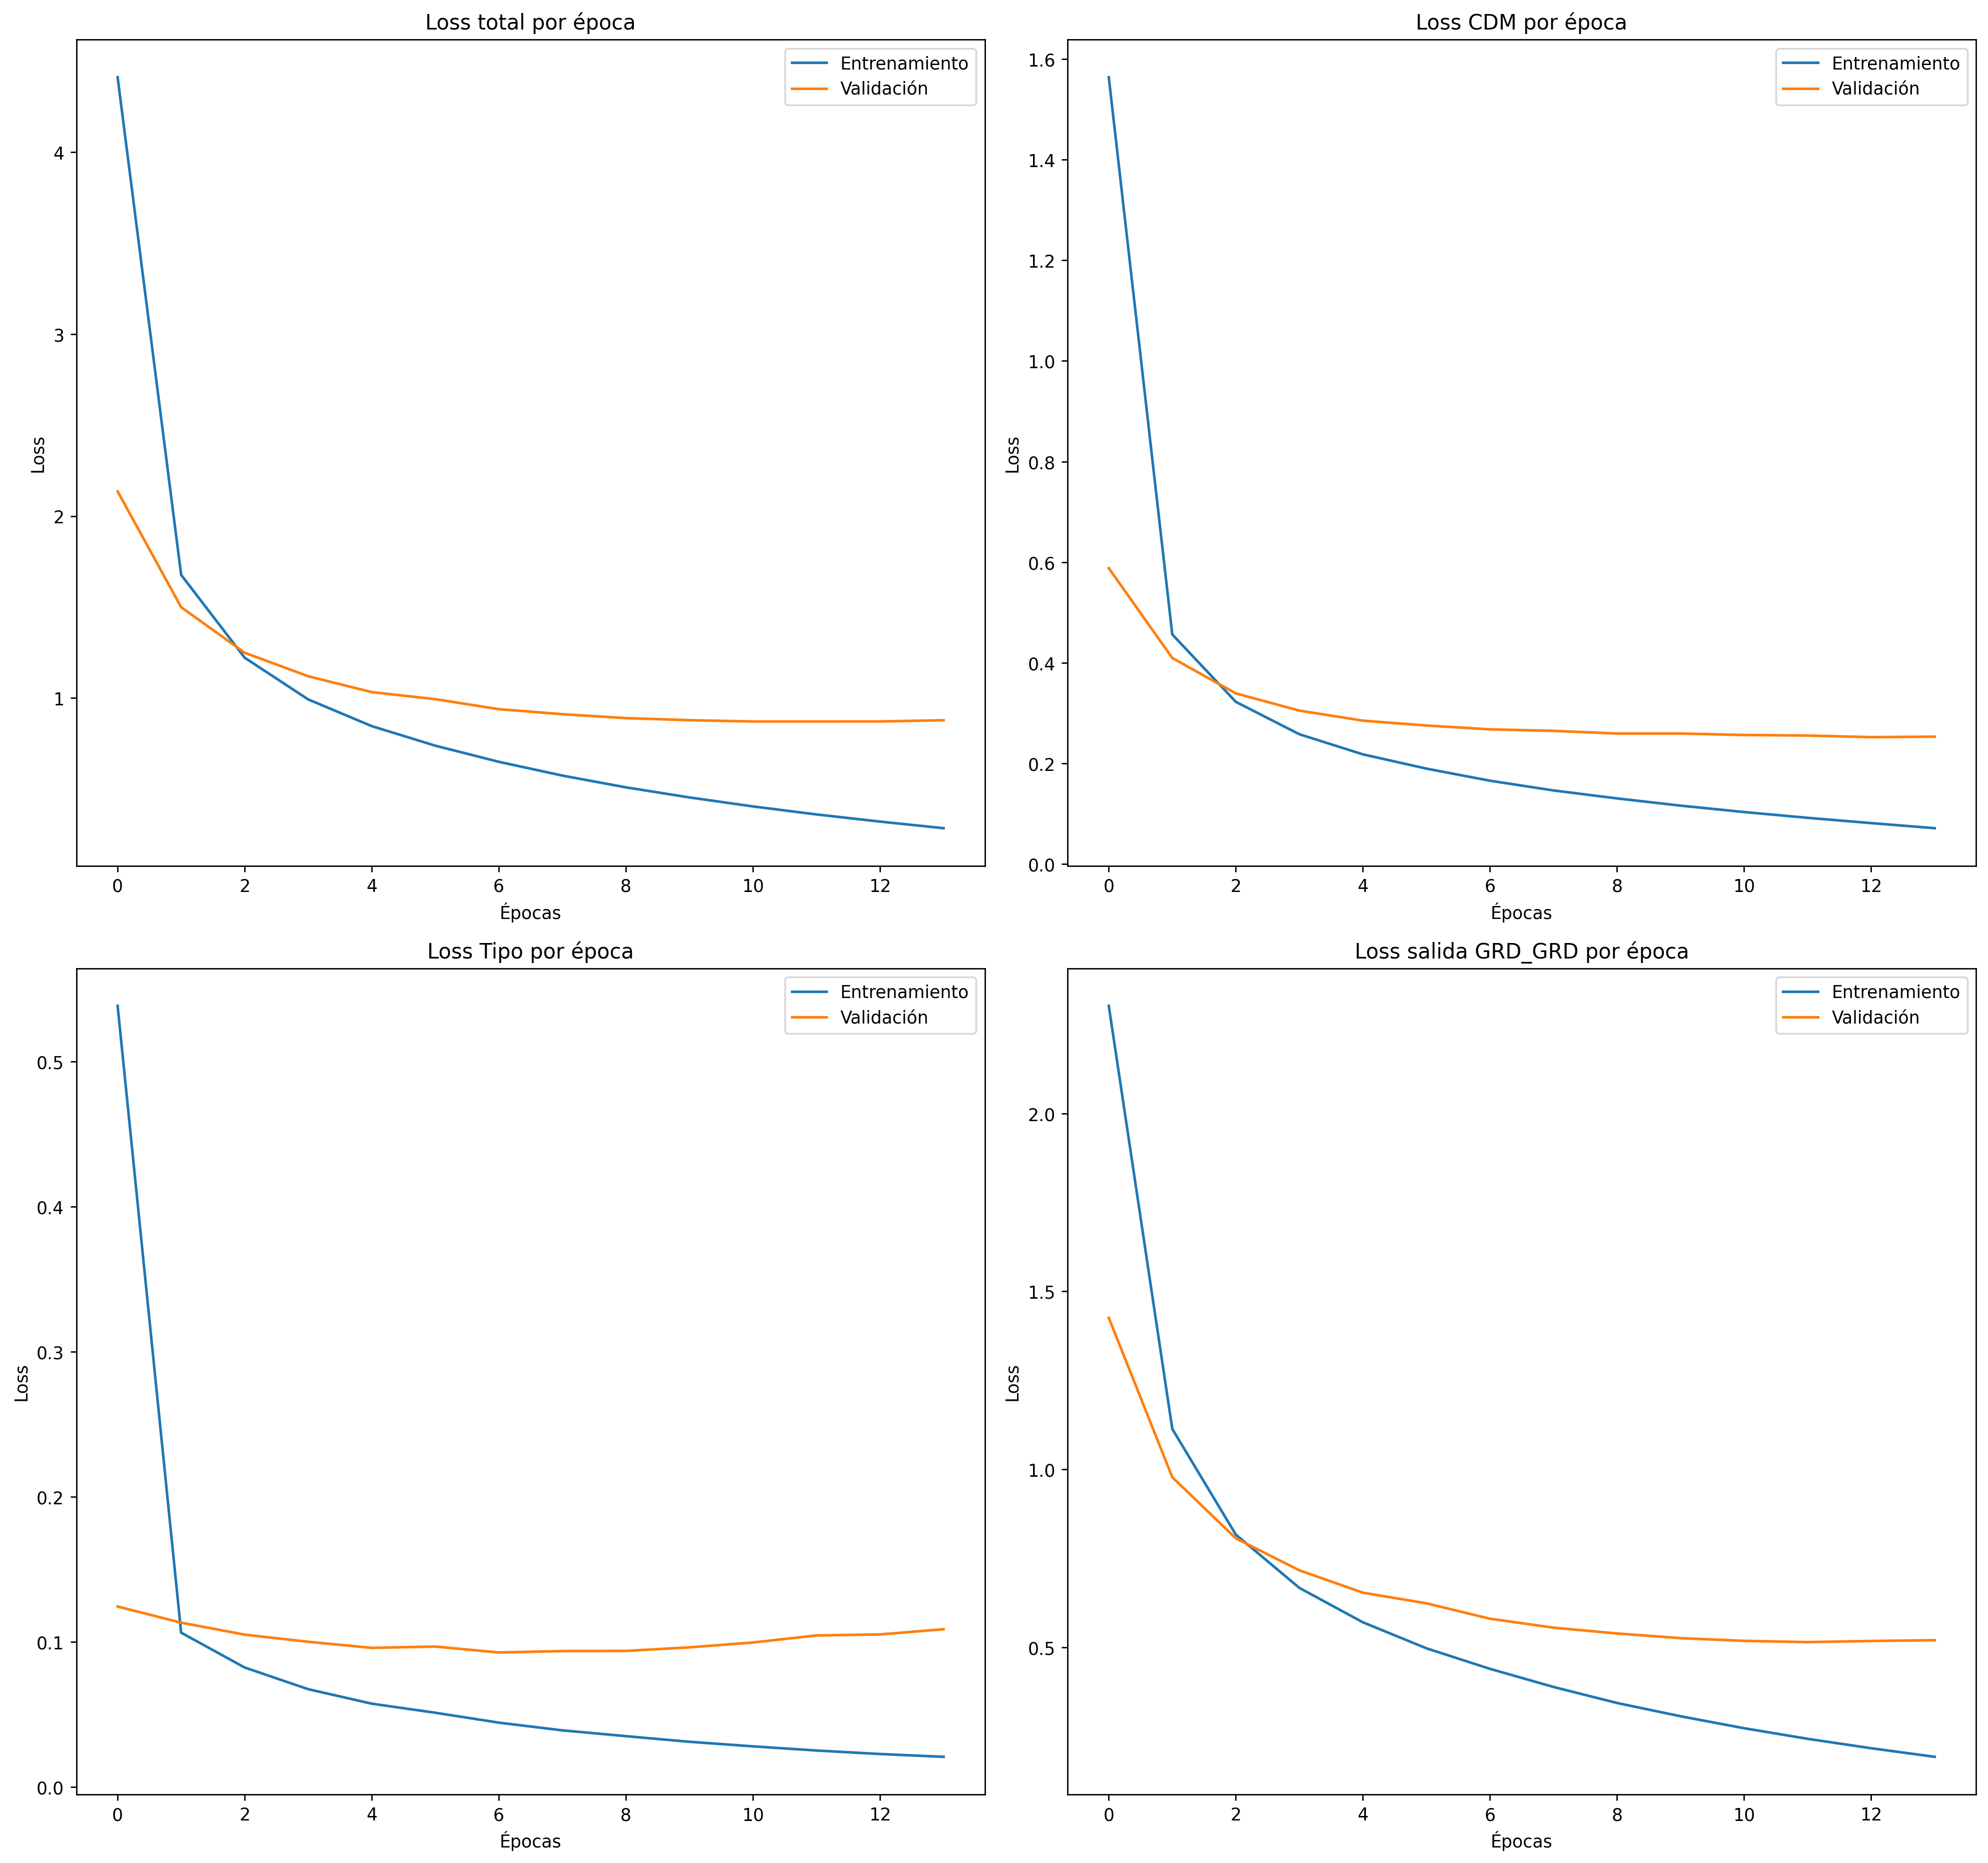

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(16, 15), dpi = 250)

# Loss total (combinada de todas las salidas)
axes[0, 0].plot(history_sec1.history['loss'], label='Entrenamiento')
axes[0, 0].plot(history_sec1.history['val_loss'], label='Validación')
axes[0, 0].set_title('Loss total por época')
axes[0, 0].set_xlabel('Épocas')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Salida CDM
axes[0, 1].plot(history_sec1.history['output_cdm_loss'], label='Entrenamiento')
axes[0, 1].plot(history_sec1.history['val_output_cdm_loss'], label='Validación')
axes[0, 1].set_title('Loss CDM por época')
axes[0, 1].set_xlabel('Épocas')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Salida Tipo
axes[1, 0].plot(history_sec1.history['output_tipo_loss'], label='Entrenamiento')
axes[1, 0].plot(history_sec1.history['val_output_tipo_loss'], label='Validación')
axes[1, 0].set_title('Loss Tipo por época')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Salida GRD_GRD
axes[1, 1].plot(history_sec1.history['output_grd_loss'], label='Entrenamiento')
axes[1, 1].plot(history_sec1.history['val_output_grd_loss'], label='Validación')
axes[1, 1].set_title('Loss salida GRD_GRD por época')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Accuracy / Precision / Recall / F1

In [107]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred_probs_sec1= modelo_sec1.predict(input_test_dict)


def evaluacion_base(y_test, y_pred_probs, nombre=''):
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1) 

    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    recall = recall_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
    print(f"\nEvaluación {nombre}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted', zero_division=0)
    print(f"\nPonderado {nombre}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")


evaluacion_base(y_test_cdm,y_pred_probs_sec1[0], 'CDM')
evaluacion_base(y_test_tipo,y_pred_probs_sec1[1], 'Tipo')
evaluacion_base(y_test_grd,y_pred_probs_sec1[2], 'GRD')

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

Evaluación CDM:
Accuracy:  0.9456
Precision: 0.8180
Recall:    0.7939
F1 Score:  0.8021

Ponderado CDM:
Precision: 0.9457
Recall:    0.9456
F1 Score:  0.9449

Evaluación Tipo:
Accuracy:  0.9767
Precision: 0.9688
Recall:    0.9674
F1 Score:  0.9681

Ponderado Tipo:
Precision: 0.9767
Recall:    0.9767
F1 Score:  0.9767

Evaluación GRD:
Accuracy:  0.8848
Precision: 0.7094
Recall:    0.7022
F1 Score:  0.6997

Ponderado GRD:
Precision: 0.8847
Recall:    0.8848
F1 Score:  0.8829


### Curvas ROC

In [109]:
df_mod_clean_token['GRD_CDM'].value_counts()

GRD_CDM
14    2925
06    1548
04    1530
13    1489
07     905
05     739
15     734
11     704
09     593
01     492
19     314
21     282
08     250
10     192
16     124
12     115
18     110
22     110
03      87
20      32
02      29
17      12
Name: count, dtype: int64

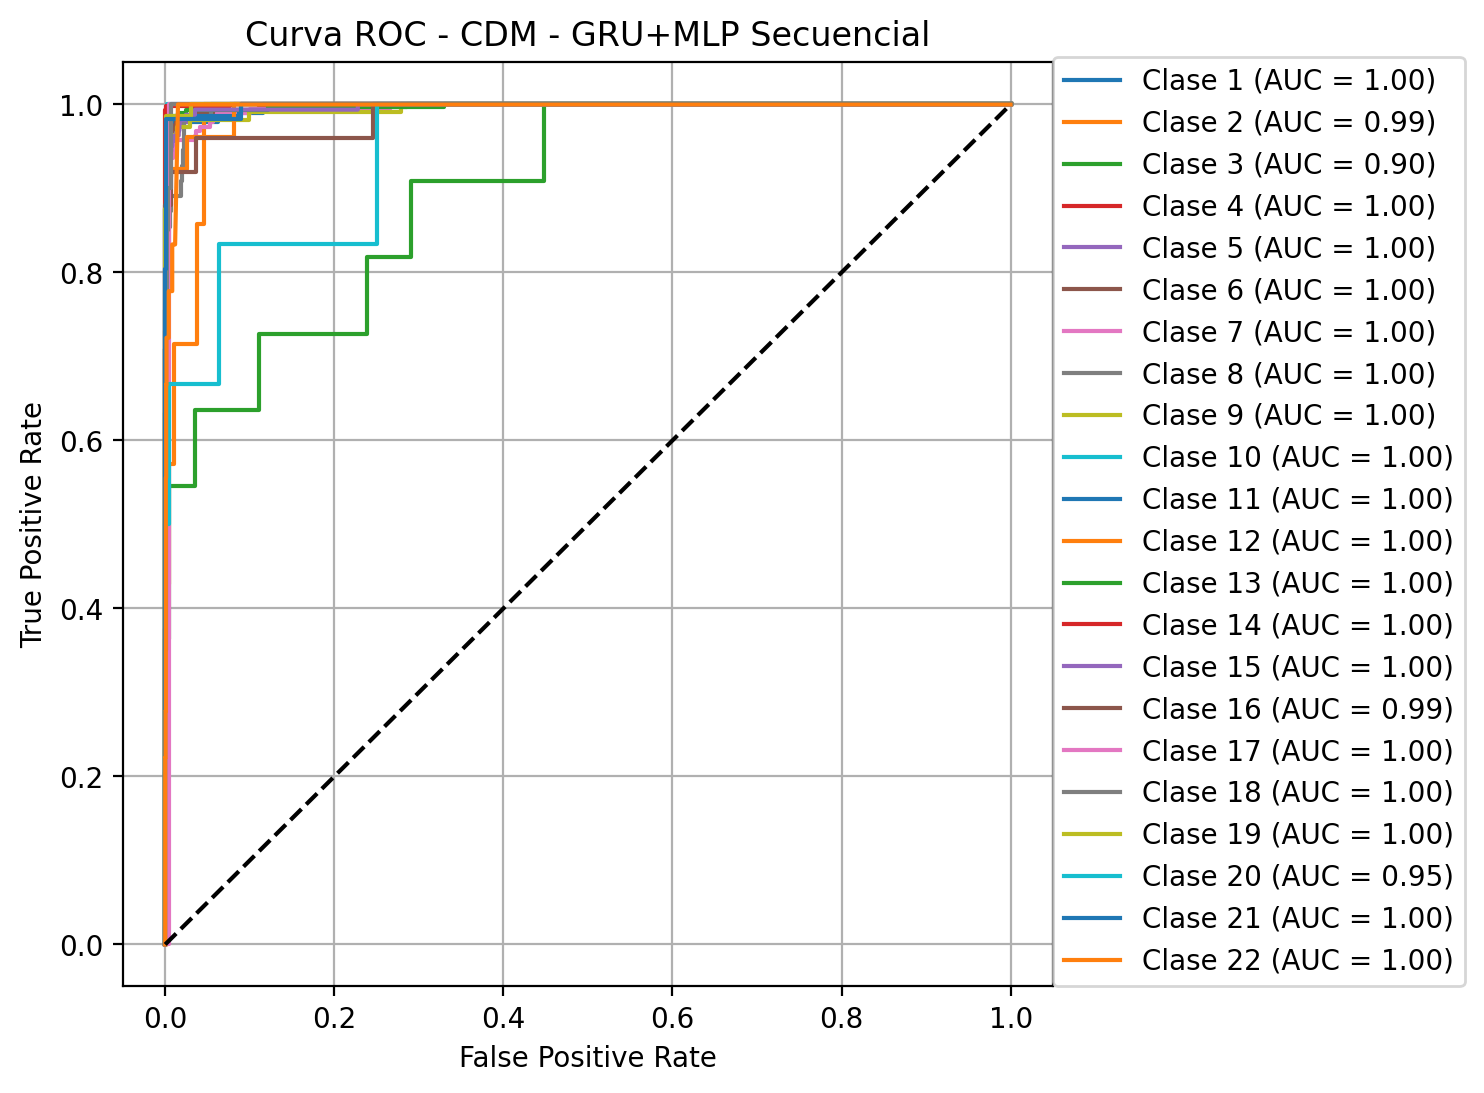

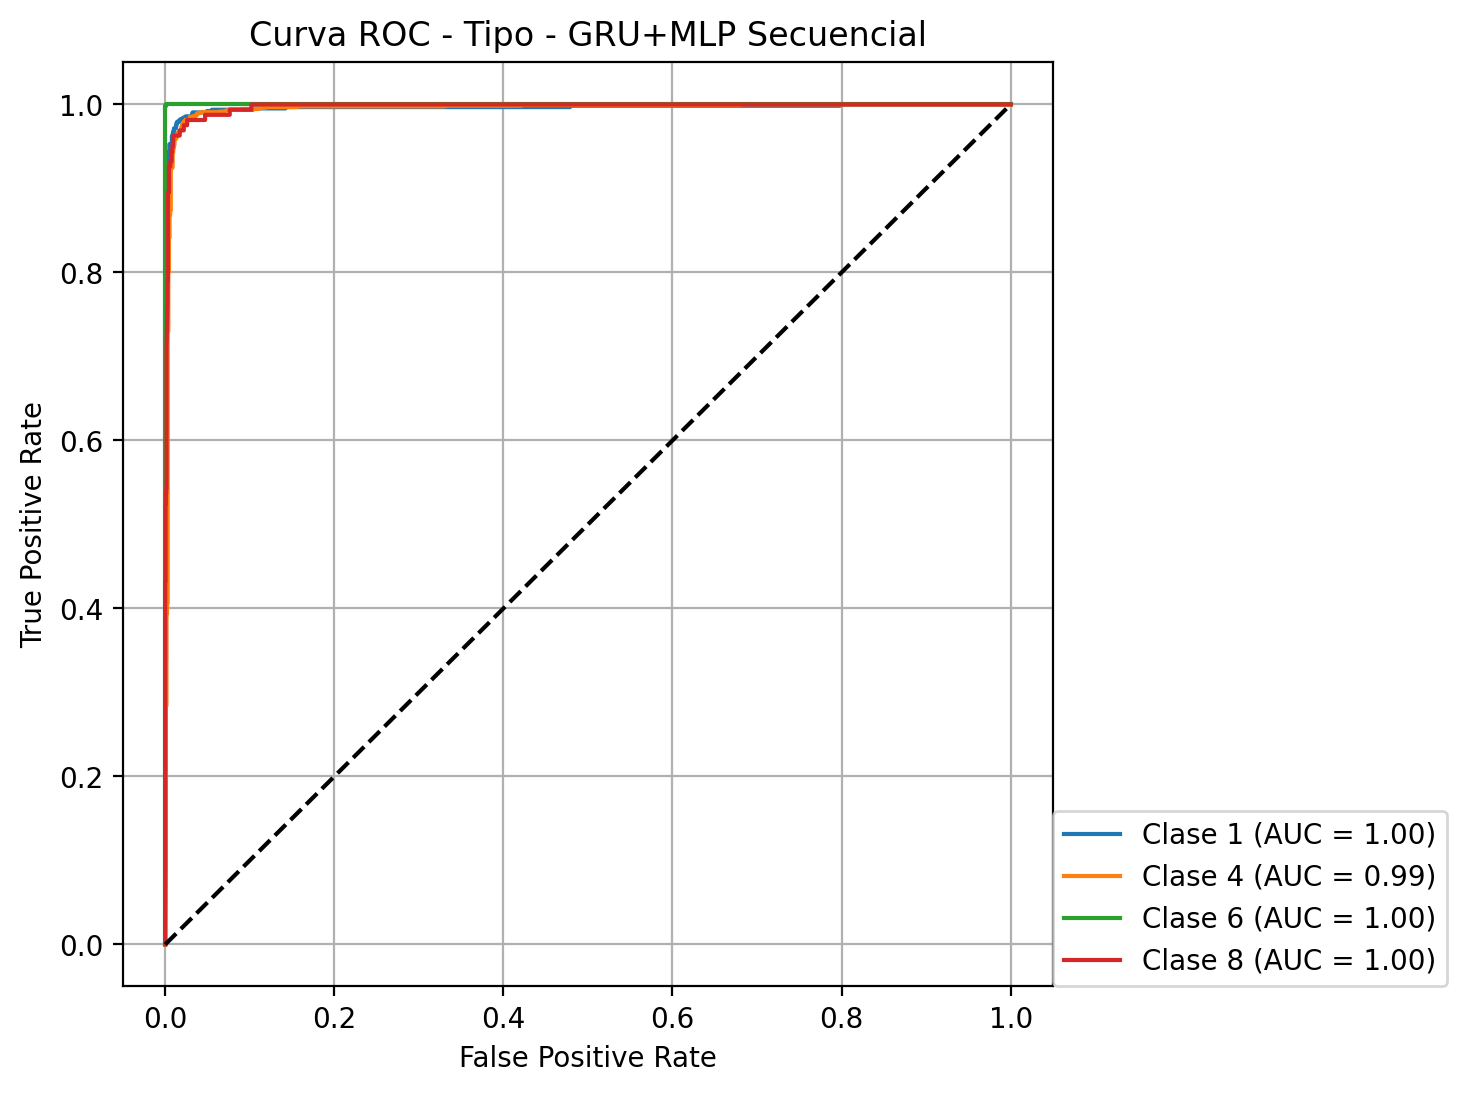

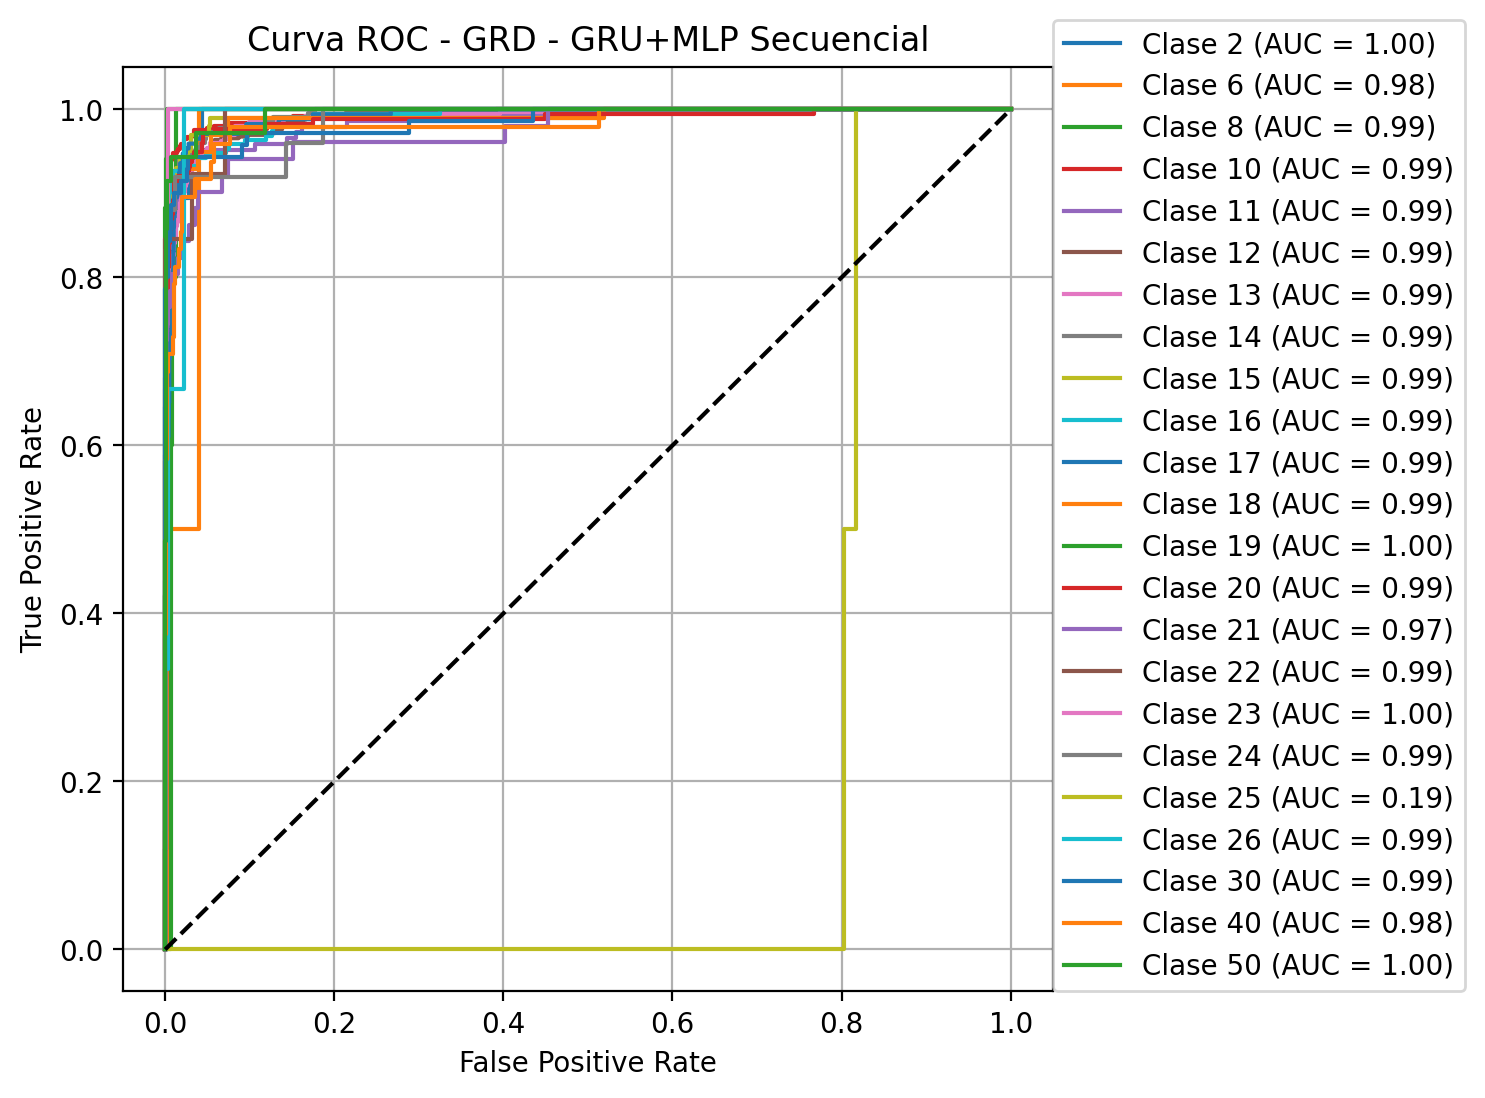

In [110]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Suponiendo que ya tienes las predicciones:
# y_pred1, y_pred2, y_pred3 = modelo_cascada.predict(input_test_dict)
# Y también las verdaderas en one-hot:
# y_test1, y_test2, y_test3

# Nombres opcionales
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = []
y_trues = [y_test_cdm, y_test_tipo, y_test_grd]
for item in y_pred_probs_sec1:
    y_preds.append(item)


for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular FPR, TPR para cada clase
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        fpr[j], tpr[j], _ = roc_curve(y_true[:, j], y_pred[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot ROC para cada clase en una figura
    plt.figure(figsize=(6, 6), dpi=200)
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        plt.plot(fpr[j], tpr[j], label=f'Clase {j+1} (AUC = {roc_auc[j]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Curva ROC - {output_labels[i]} - GRU+MLP Secuencial')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = (1,0))
    plt.grid(True)
    plt.show()

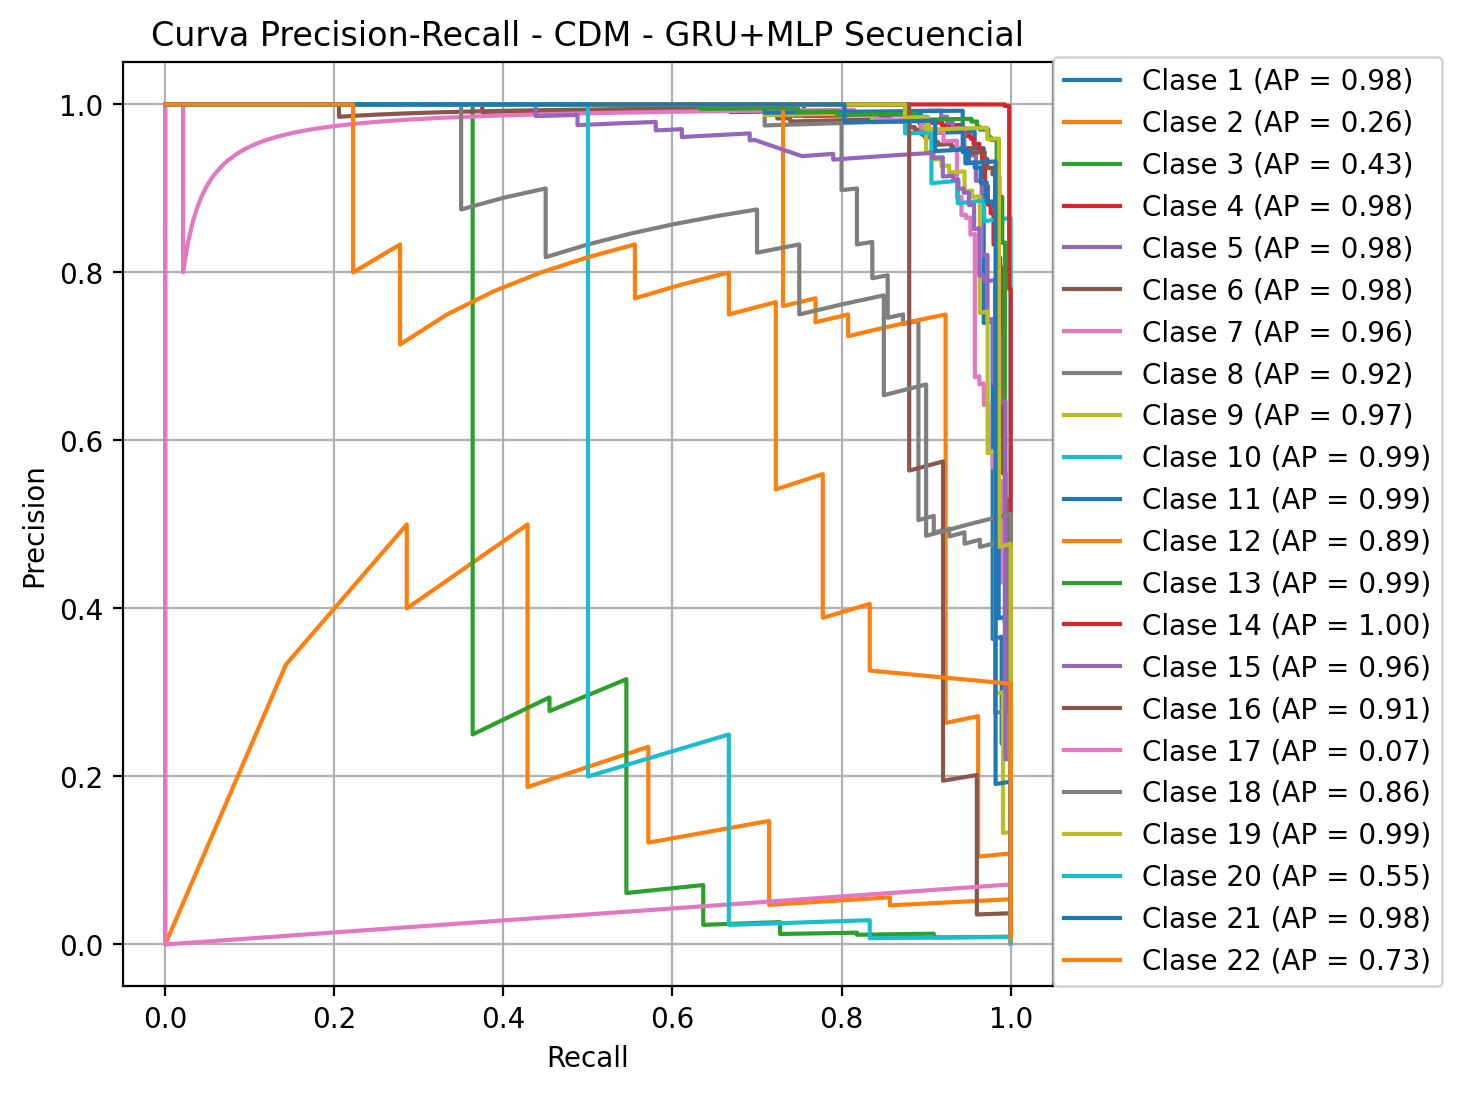

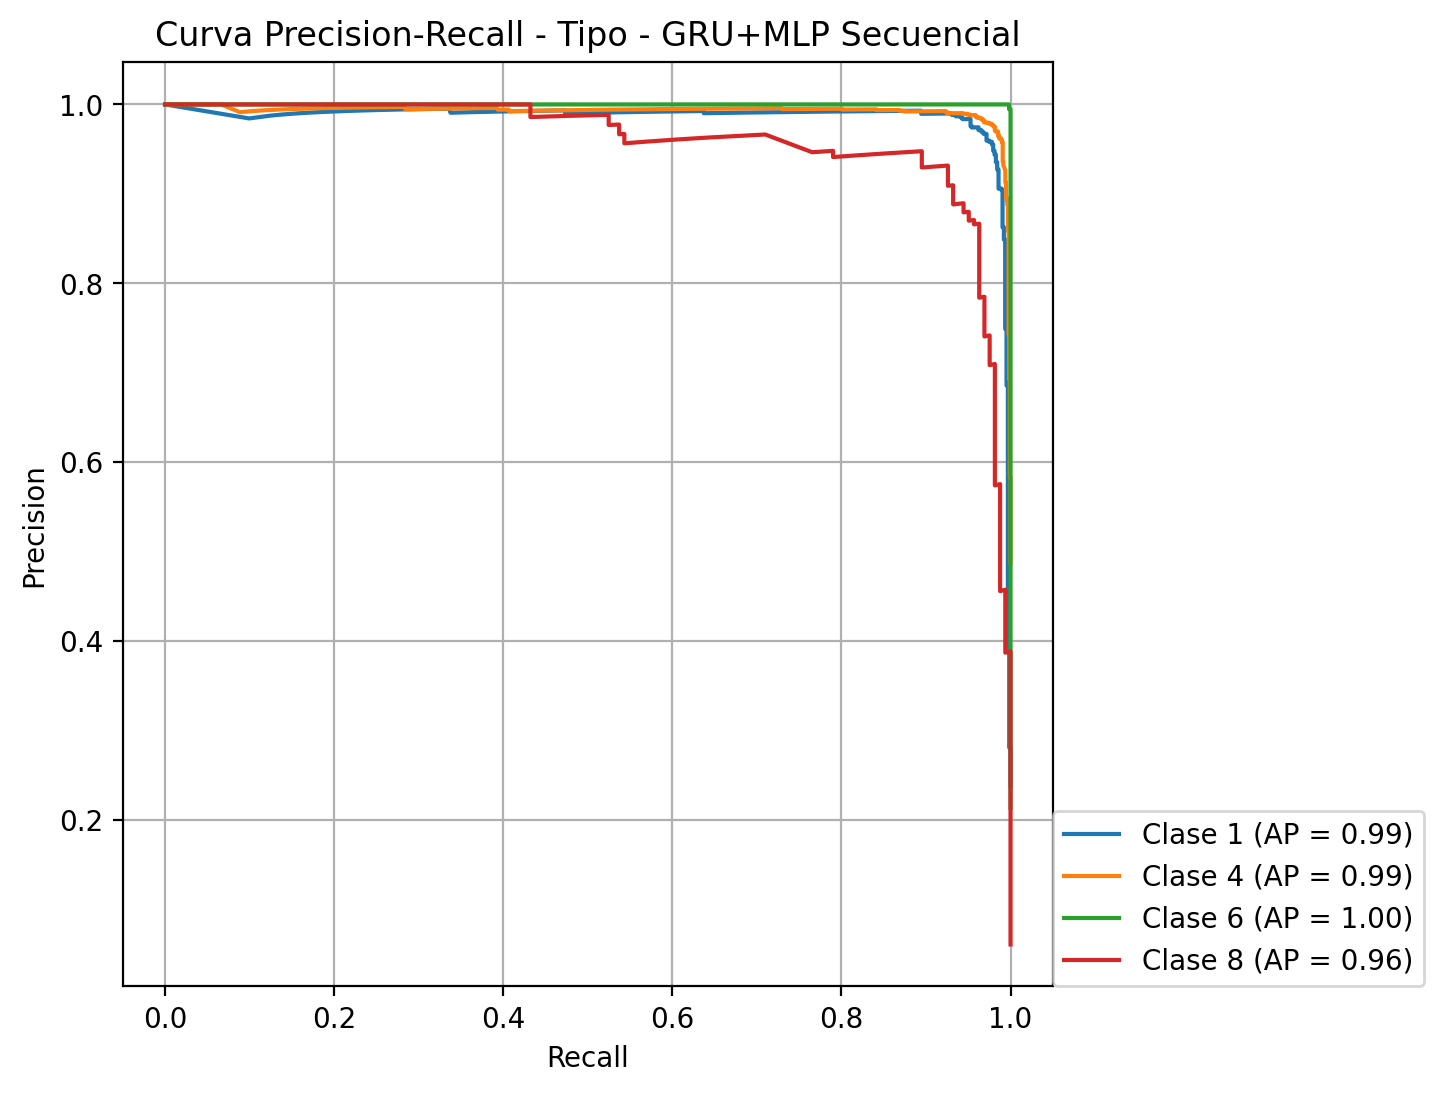

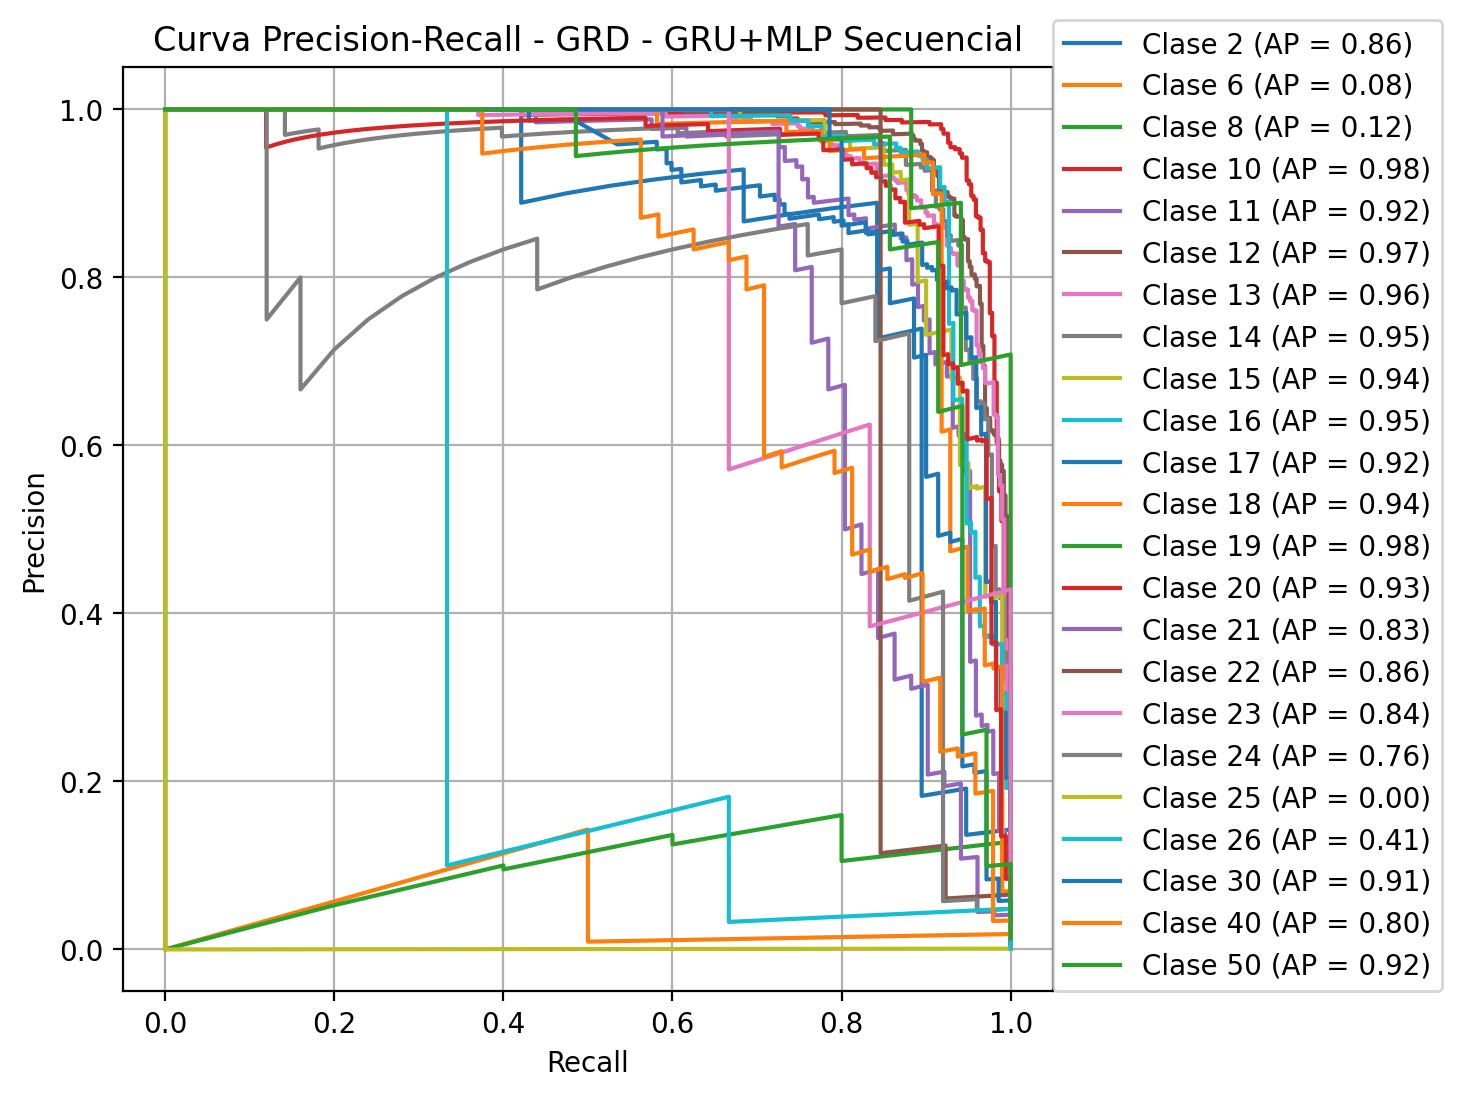

In [111]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de salida
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = [y_pred_probs_sec1[0], y_pred_probs_sec1[1], y_pred_probs_sec1[2]]
y_trues = [y_test_cdm, y_test_tipo, y_test_grd]

for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    precision, recall, pr_auc = dict(), dict(), dict()

    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # Clase sin positivos y negativos
        precision[j], recall[j], _ = precision_recall_curve(y_true[:, j], y_pred[:, j])
        pr_auc[j] = average_precision_score(y_true[:, j], y_pred[:, j])

    plt.figure(figsize=(6, 6),dpi=200)
    for j in pr_auc.keys():
        plt.plot(recall[j], precision[j], label=f'Clase {j+1} (AP = {pr_auc[j]:.2f})')

    plt.title(f'Curva Precision-Recall - {output_labels[i]} - GRU+MLP Secuencial')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(1,0))
    plt.grid(True)
    plt.show()

## Modelos no Neuronales


### Preparacion dataset

In [112]:
X_non = np.hstack([
    np.array(df_mod_clean_token['Diag01Token'].tolist()),
    np.array(df_mod_clean_token['DiagSecundariosToken'].tolist()),
    np.array(df_mod_clean_token['Proced01Token'].tolist()),
    np.array(df_mod_clean_token['ProcedSecundariosToken'].tolist()),
    np.array(df_mod_clean_token['Edad en años']).reshape(-1, 1),
    np.array(df_mod_clean_token['Sexo_bin']).reshape(-1, 1),
])

In [113]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [114]:
# Dividir en entrenamiento y prueba
X_non_train, X_non_test, y_train, y_test = train_test_split(X_non, y, test_size=0.2, random_state=42)

In [115]:
# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_non_train)
X_test_scaled = scaler.transform(X_non_test)


### Random Forest

In [116]:
df_mod_clean_token.head()

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09  \
12  [F, 20, .6]  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN   
15  [I, 20, .0]  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10   
20  [P, 22, .1]  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7   
26  [D, 64, .8]    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5   
32  [K, 86, .8]  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN   

   Diag10  ... num_proced                                    DiagSecundarios  \
12    NaN  ...         19                             [F, 14, .2, F, 10, .2]   
15  U07.1  ...         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20  Z65.3  ...         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26  E11.9  ...         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32    NaN  ...         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios      Diag01Token  \
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...    [469, 176, 3]   
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...    [470, 176, 4]   
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...    [478, 168, 5]   
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  [465, 238, 456]   
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  [467, 182, 456]   

   Proced01Token                               DiagSecundariosToken  \
12      [46, 35]  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15      [15, 26]  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20      [15, 55]  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26       [5, 76]  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32       [7, 29]  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                               ProcedSecundariosToken GRD_CDM GRD_Tipo GRD_GRD  
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...      19        4      10  
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...      05        4      20  
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...      15        8      12  
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...      16        4      13  
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...      07        4      12  

[5 rows x 80 columns]

In [117]:
# Entrenar modelo Random Forest
#rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=1, min_samples_split=2 ,class_weight='balanced', max_depth=20)
rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)

# Reporte de mÃ©tricas
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Report:
              precision    recall  f1-score   support

       01413       0.00      0.00      0.00         3
       01414       0.77      1.00      0.87        41
       01416       0.83      1.00      0.91         5
       01417       0.00      0.00      0.00         1
       01421       0.00      0.00      0.00         1
       01422       0.92      0.92      0.92        12
       01423       0.50      0.80      0.62         5
       01424       0.50      0.81      0.62        21
       01425       0.00      0.00      0.00         2
       01426       0.00      0.00      0.00         3
       02130       0.00      0.00      0.00         1
       02410       0.00      0.00      0.00         1
       02412       0.00      0.00      0.00         5
       03120       1.00      0.50      0.67         2
       03413       0.40      0.40      0.40         5
       03414       0.00      0.00      0.00         2
       03415       0.00      0.00      0.00         2
     

In [118]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='weighted')
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest Metrics:
Accuracy:  0.7271
Precision: 0.7168
Recall:    0.7271
F1 Score:  0.6994


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [119]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro')
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Macro Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest Macro Metrics:
Accuracy:  0.7271
Precision: 0.4003
Recall:    0.3696
F1 Score:  0.3570


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro')
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Macro Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest Macro Metrics:
Accuracy:  0.7271
Precision: 0.4003
Recall:    0.3696
F1 Score:  0.3570


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random forest cascada

#### Preparacion x e y

In [121]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_Tipo']
y_grd = df_mod_clean_token['GRD_GRD']

In [122]:
df_mod_clean_token.head()

Diag01 Diag02 Diag03  Diag04 Diag05  Diag06 Diag07 Diag08 Diag09  \
12  [F, 20, .6]  F14.2  F10.2     NaN    NaN     NaN    NaN    NaN    NaN   
15  [I, 20, .0]  I25.1  I50.0  I70.20  I65.2  I70.80  I77.8  I25.2    I10   
20  [P, 22, .1]  P28.4  Q21.1   P61.2  P03.4   P02.1  P59.0  P07.3  Z59.7   
26  [D, 64, .8]    D70  D69.6   N30.8    R31   K72.1  K62.8  C53.9  E87.5   
32  [K, 86, .8]  U07.1  Z88.8     NaN    NaN     NaN    NaN    NaN    NaN   

   Diag10  ... num_proced                                    DiagSecundarios  \
12    NaN  ...         19                             [F, 14, .2, F, 10, .2]   
15  U07.1  ...         24  [I, 25, .1, I, 50, .0, I, 70, .20, I, 65, .2, ...   
20  Z65.3  ...         24  [P, 28, .4, Q, 21, .1, P, 61, .2, P, 03, .4, P...   
26  E11.9  ...         28  [D, 70, D, 69, .6, N, 30, .8, R, 31, K, 72, .1...   
32    NaN  ...         24                             [U, 07, .1, Z, 88, .8]   

                                    ProcedSecundarios      Diag01Token  \
12  [87, .44, 88, .76, 99, .26, 99, .29, 90, .59, ...    [469, 176, 3]   
15  [88, .72, 89, .52, 88, .71, 88, .77, 87, .44, ...    [470, 176, 4]   
20  [88, .71, 88, .72, 89, .50, 88, .79, 99, .83, ...    [478, 168, 5]   
26  [57, .32, 45, .23, 45, .13, 88, .01, 87, .41, ...  [465, 238, 456]   
32  [88, .38, 96, .59, 99, .84, 99, .18, 99, .19, ...  [467, 182, 456]   

   Proced01Token                               DiagSecundariosToken  \
12      [46, 35]  [469, 193, 6, 469, 158, 6, 0, 0, 0, 0, 0, 0, 0...   
15      [15, 26]  [470, 151, 5, 470, 206, 4, 470, 185, 176, 470,...   
20      [15, 55]  [478, 199, 457, 462, 155, 5, 478, 229, 6, 478,...   
26       [5, 76]  [465, 185, 465, 242, 3, 466, 172, 456, 476, 16...   
32       [7, 29]  [480, 244, 5, 461, 228, 456, 0, 0, 0, 0, 0, 0,...   

                               ProcedSecundariosToken GRD_CDM GRD_Tipo GRD_GRD  
12  [15, 55, 7, 58, 5, 89, 5, 30, 13, 49, 19, 77, ...      19        4      10  
15  [7, 45, 19, 44, 7, 39, 7, 2, 15, 55, 13, 20, 1...      05        4      20  
20  [7, 39, 7, 45, 19, 91, 7, 4, 5, 37, 64, 17, 64...      15        8      12  
26  [62, 43, 36, 47, 36, 73, 7, 29, 15, 26, 15, 18...      16        4      13  
32  [7, 9, 32, 49, 5, 12, 5, 96, 5, 35, 5, 16, 5, ...      07        4      12  

[5 rows x 80 columns]

In [123]:
X_non_train, X_non_test, y_cdm_train, y_cdm_test, y_tipo_train, y_tipo_test, y_grd_train, y_grd_test  = train_test_split(X_non, y_cdm, y_tipo, y_grd, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_non_train)
X_test_scaled = scaler.transform(X_non_test)


#### Modelo/Fit CDM

In [124]:
# Entrenar modelo Random Forest
#rf_cdm = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_cdm = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=1, min_samples_split=2 ,class_weight='balanced', max_depth=20)

rf_cdm.fit(X_train_scaled, y_cdm_train)

# Predicciones
y_pred_cdm_train_rf = rf_cdm.predict(X_train_scaled)
y_pred_cdm_test_rf = rf_cdm.predict(X_test_scaled)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_cdm_test, y_pred_cdm_test_rf, zero_division=0))


Random Forest Report:
              precision    recall  f1-score   support

          01       0.88      0.87      0.88        94
          02       0.00      0.00      0.00         7
          03       1.00      0.09      0.17        11
          04       0.89      0.89      0.89       296
          05       0.73      0.87      0.79       146
          06       0.78      0.87      0.83       326
          07       0.90      0.83      0.86       189
          08       0.88      0.64      0.74        55
          09       0.84      0.73      0.78       110
          10       0.84      0.66      0.74        32
          11       0.80      0.80      0.80       141
          12       1.00      0.54      0.70        26
          13       0.85      0.93      0.89       302
          14       0.99      1.00      0.99       569
          15       0.88      0.96      0.92       162
          16       1.00      0.20      0.33        25
          17       0.00      0.00      0.00         1
     

#### Modelo/Fit Tipo

In [125]:
X_tipo_train = np.hstack([X_train_scaled, y_pred_cdm_train_rf.reshape(-1, 1)])
X_tipo_test = np.hstack([X_test_scaled, y_pred_cdm_test_rf.reshape(-1, 1)])

In [126]:

#rf_tipo = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_tipo = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=1, min_samples_split=2 ,class_weight='balanced', max_depth=20)

rf_tipo.fit(X_tipo_train, y_tipo_train)

# Predicciones
y_pred_tipo_train_rf = rf_tipo.predict(X_tipo_train)
y_pred_tipo_test_rf = rf_tipo.predict(X_tipo_test)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_tipo_test, y_pred_tipo_test_rf, zero_division=0))

Random Forest Report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.89       634
           4       0.94      0.94      0.94      1299
           6       0.99      1.00      0.99       569
           8       0.89      0.98      0.94       162

    accuracy                           0.94      2664
   macro avg       0.93      0.95      0.94      2664
weighted avg       0.94      0.94      0.94      2664



#### Modelo/Fit GRD

In [127]:
X_grd_train = np.hstack([X_train_scaled, y_pred_cdm_train_rf.reshape(-1, 1), y_pred_tipo_train_rf.reshape(-1, 1)])
X_grd_test = np.hstack([X_test_scaled, y_pred_cdm_test_rf.reshape(-1, 1),y_pred_tipo_test_rf.reshape(-1, 1)])

#rf_grd = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_grd = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=1, min_samples_split=2 ,class_weight='balanced', max_depth=20)

rf_grd.fit(X_grd_train, y_grd_train)

# Predicciones
y_pred_grd_train_rf = rf_grd.predict(X_grd_train)
y_pred_grd_test_rf = rf_grd.predict(X_grd_test)

# Reporte de metricas
print("Random Forest Report:")
print(classification_report(y_grd_test, y_pred_grd_test_rf, zero_division=0))

Random Forest Report:
              precision    recall  f1-score   support

          02       0.86      0.32      0.46        19
          06       0.00      0.00      0.00         2
          08       0.00      0.00      0.00         5
          10       0.85      0.82      0.83       365
          11       0.84      0.52      0.64       146
          12       0.69      0.85      0.76       496
          13       0.79      0.71      0.75       397
          14       0.83      0.74      0.78       226
          15       0.86      0.67      0.75       100
          16       0.75      0.76      0.75       192
          17       0.68      0.87      0.77       172
          18       0.65      0.61      0.63        98
          19       0.50      0.47      0.48        17
          20       0.55      0.78      0.65       176
          21       0.88      0.59      0.71        51
          22       0.67      0.46      0.55        13
          23       0.80      0.67      0.73         6
     

#### Accuracy Precision Recall

In [128]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


precision = precision_score(y_cdm_test, y_pred_cdm_test_rf, average='macro', zero_division=0)
recall = recall_score(y_cdm_test, y_pred_cdm_test_rf, average='macro')
accuracy = accuracy_score(y_cdm_test, y_pred_cdm_test_rf)
f1 = f1_score(y_cdm_test, y_pred_cdm_test_rf, average='macro')

print("Random Forest CDM Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest CDM Metrics:
Accuracy:  0.8675
Precision: 0.7365
Recall:    0.5963
F1 Score:  0.6185


In [129]:
precision = precision_score(y_tipo_test, y_pred_tipo_test_rf, average='macro', zero_division=0)
recall = recall_score(y_tipo_test, y_pred_tipo_test_rf, average='macro')
accuracy = accuracy_score(y_tipo_test, y_pred_tipo_test_rf)
f1 = f1_score(y_tipo_test, y_pred_tipo_test_rf, average='macro')

print("Random Forest Tipo Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest Tipo Metrics:
Accuracy:  0.9403
Precision: 0.9318
Recall:    0.9506
F1 Score:  0.9406


In [130]:
precision = precision_score(y_grd_test, y_pred_grd_test_rf, average='macro', zero_division=0)
recall = recall_score(y_grd_test, y_pred_grd_test_rf, average='macro')
accuracy = accuracy_score(y_grd_test, y_pred_grd_test_rf)
f1 = f1_score(y_grd_test, y_pred_grd_test_rf, average='macro')

print("Random Forest GRD Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest GRD Metrics:
Accuracy:  0.7395
Precision: 0.6189
Recall:    0.5384
F1 Score:  0.5627


#### Curvas

In [131]:
y_cdm = df_mod_clean_token['GRD_CDM']
y_tipo = df_mod_clean_token['GRD_Tipo']
y_grd = df_mod_clean_token['GRD_GRD']

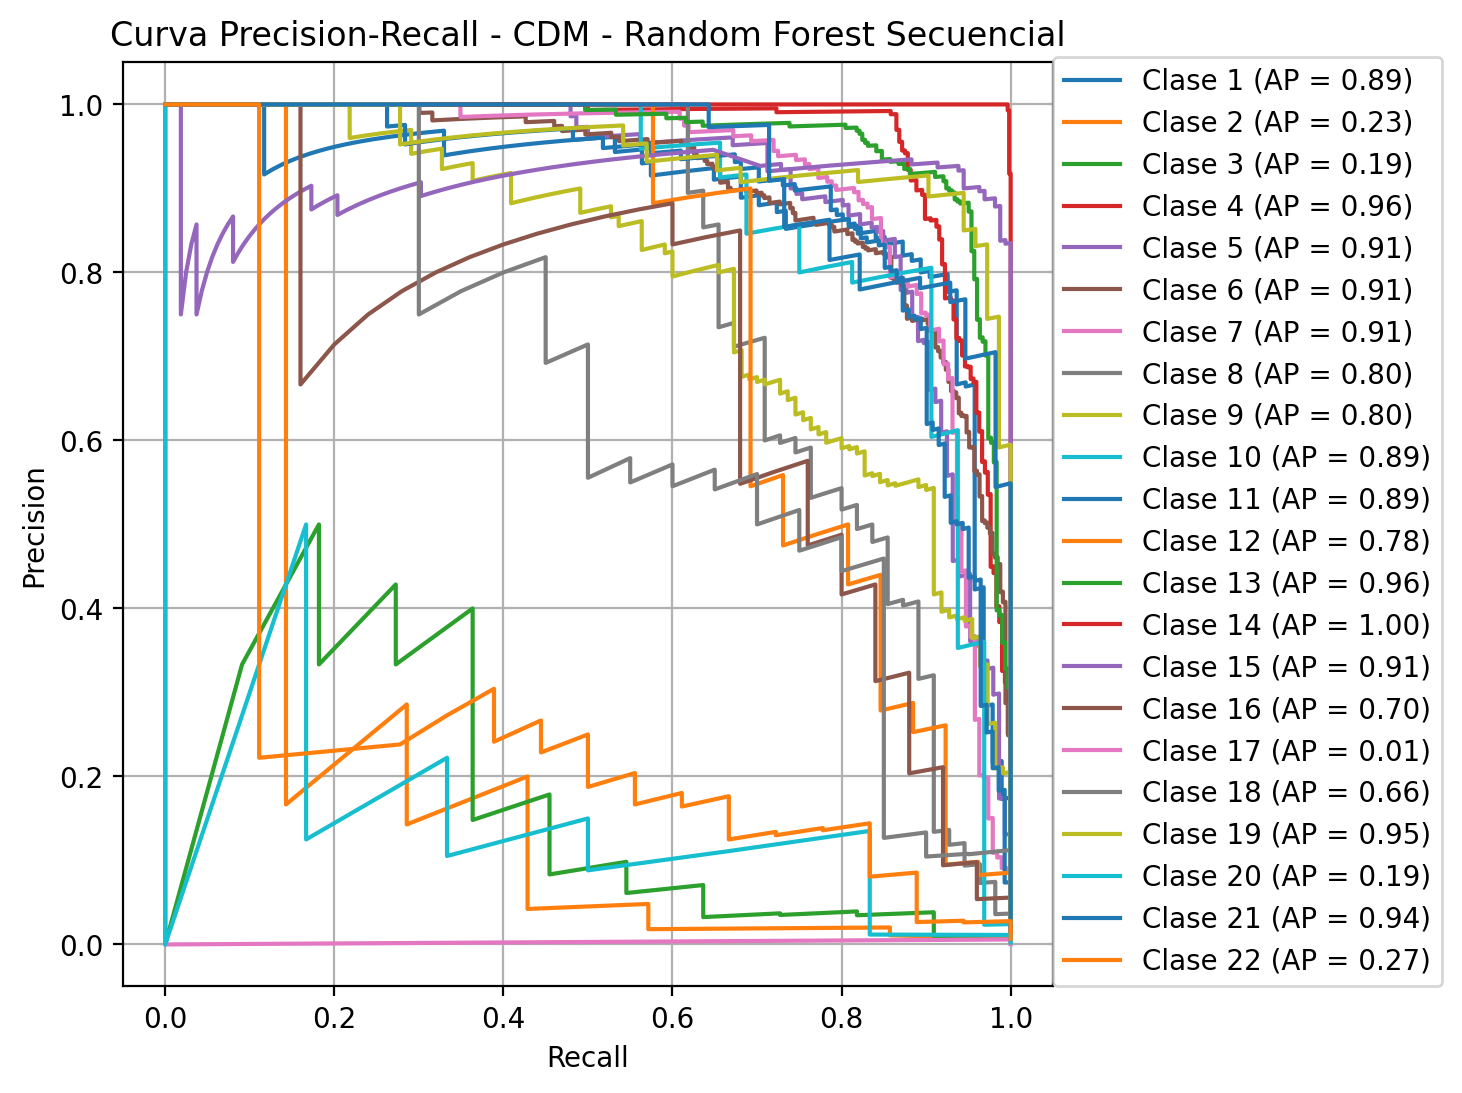

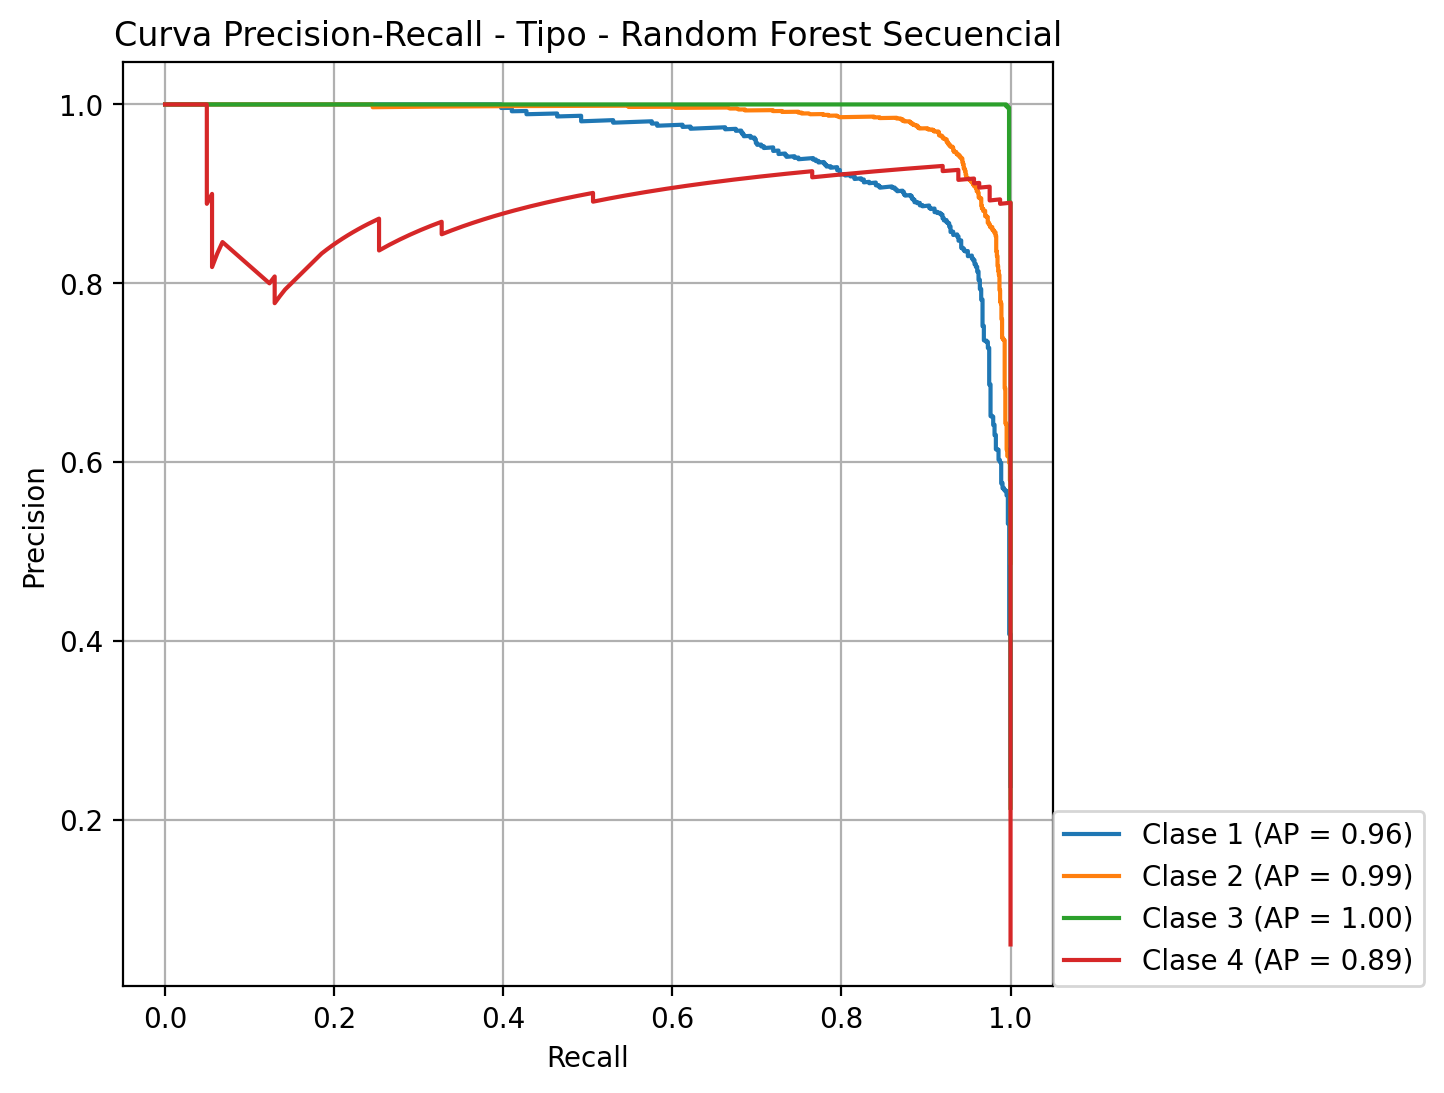

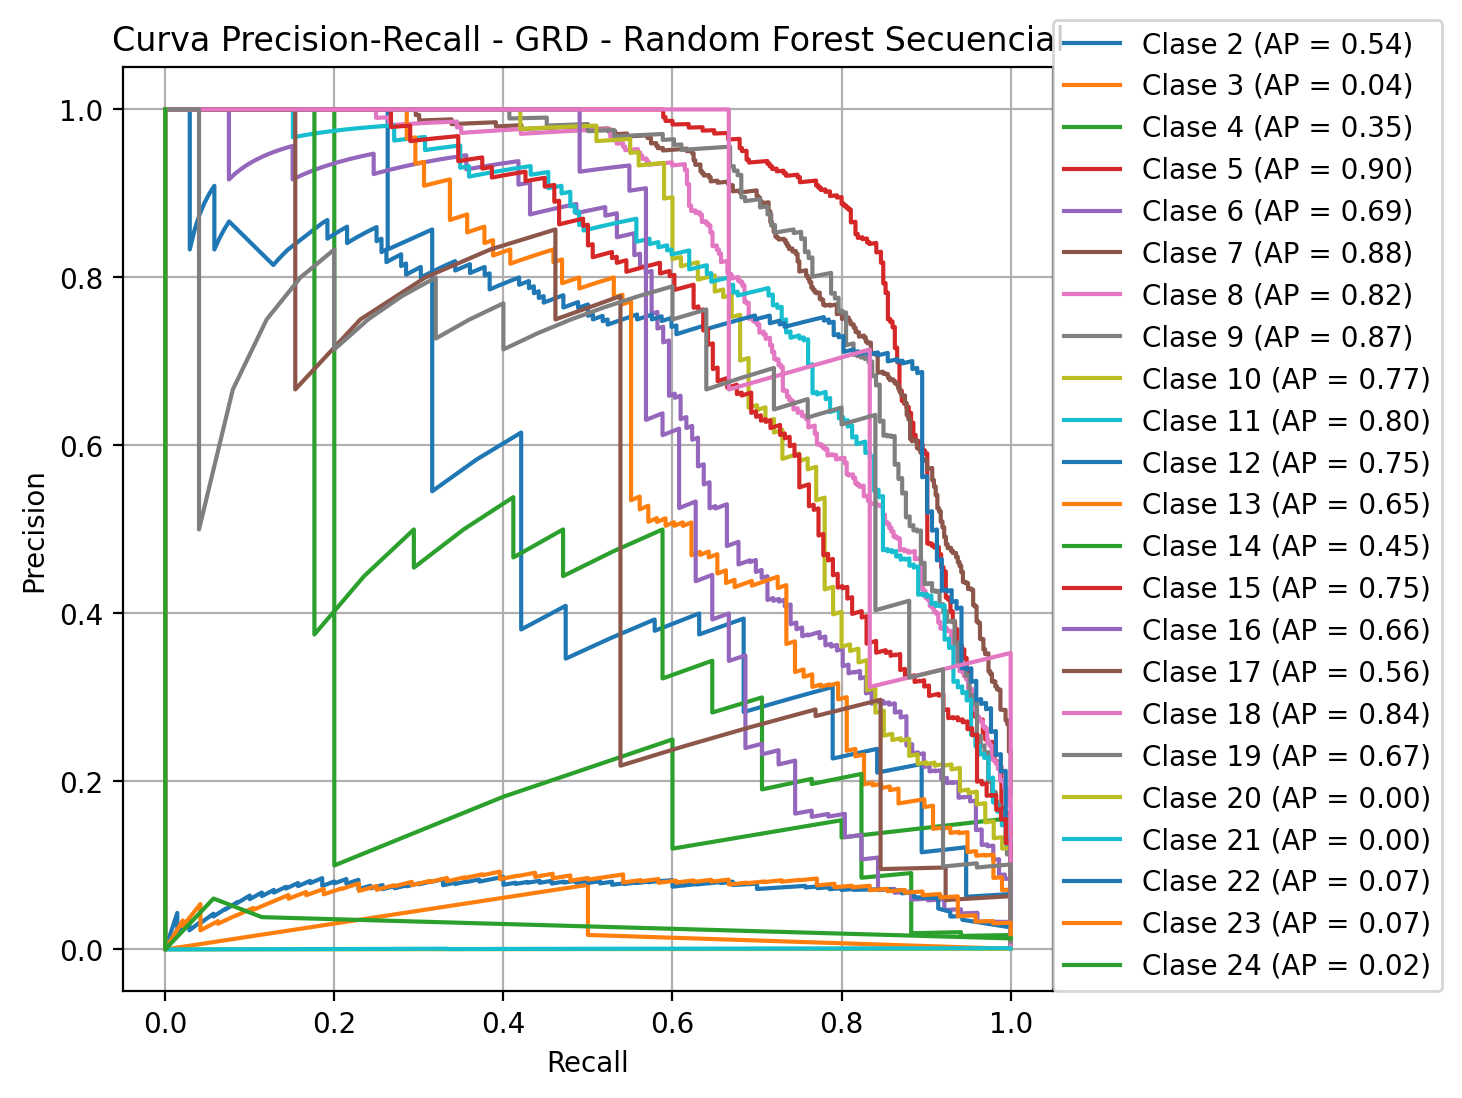

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

y_cdm_pred_proba = rf_cdm.predict_proba(X_test_scaled)  # Salida del modelo y_cdm
y_tipo_pred_proba = rf_tipo.predict_proba(X_tipo_test)  # Salida del modelo y_tipo
y_grd_pred_proba = rf_grd.predict_proba(X_grd_test)

y_cdm_test_bin = label_binarize(y_cdm_test, classes=np.unique(y_cdm))
y_tipo_test_bin = label_binarize(y_tipo_test, classes=np.unique(y_tipo))
y_grd_test_bin = label_binarize(y_grd_test, classes=np.unique(y_grd))

# Nombres opcionales
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = [y_cdm_pred_proba, y_tipo_pred_proba, y_grd_pred_proba]
y_trues = [y_cdm_test_bin, y_tipo_test_bin, y_grd_test_bin]


for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    precision, recall, pr_auc = dict(), dict(), dict()

    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # Clase sin positivos y negativos
        precision[j], recall[j], _ = precision_recall_curve(y_true[:, j], y_pred[:, j])
        pr_auc[j] = average_precision_score(y_true[:, j], y_pred[:, j])

    plt.figure(figsize=(6, 6), dpi=200)
    for j in pr_auc.keys():
        plt.plot(recall[j], precision[j], label=f'Clase {j+1} (AP = {pr_auc[j]:.2f})')

    plt.title(f'Curva Precision-Recall - {output_labels[i]} - Random Forest Secuencial')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(1,0))
    plt.grid(True)
    plt.show()

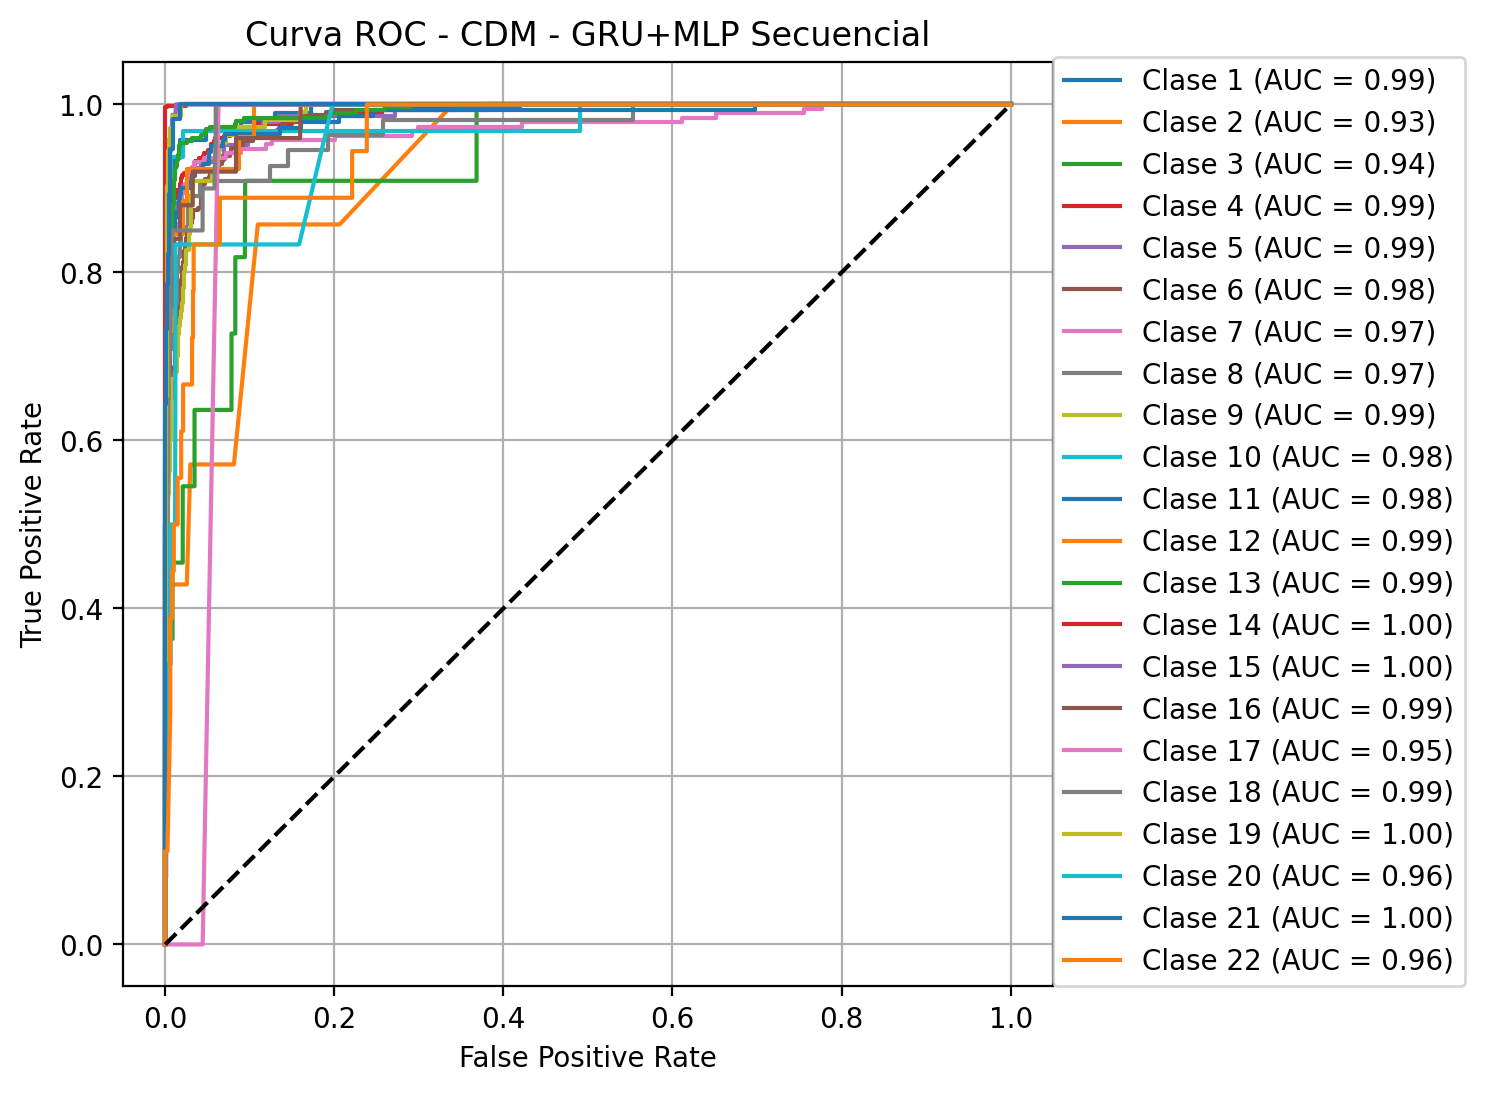

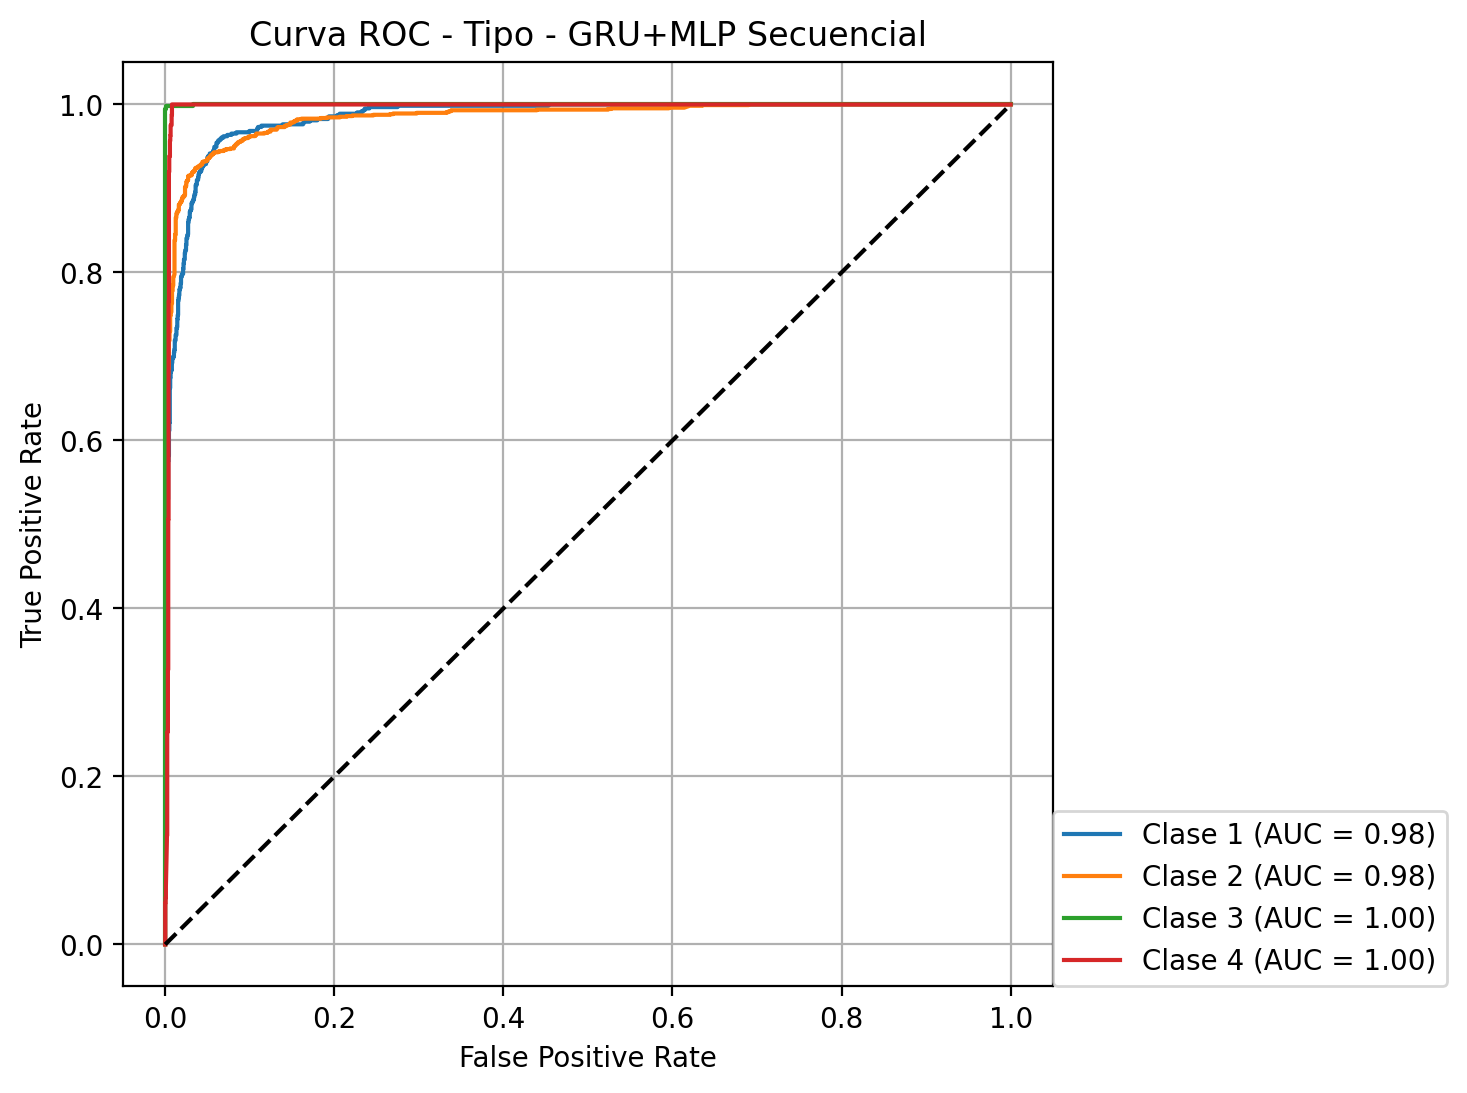

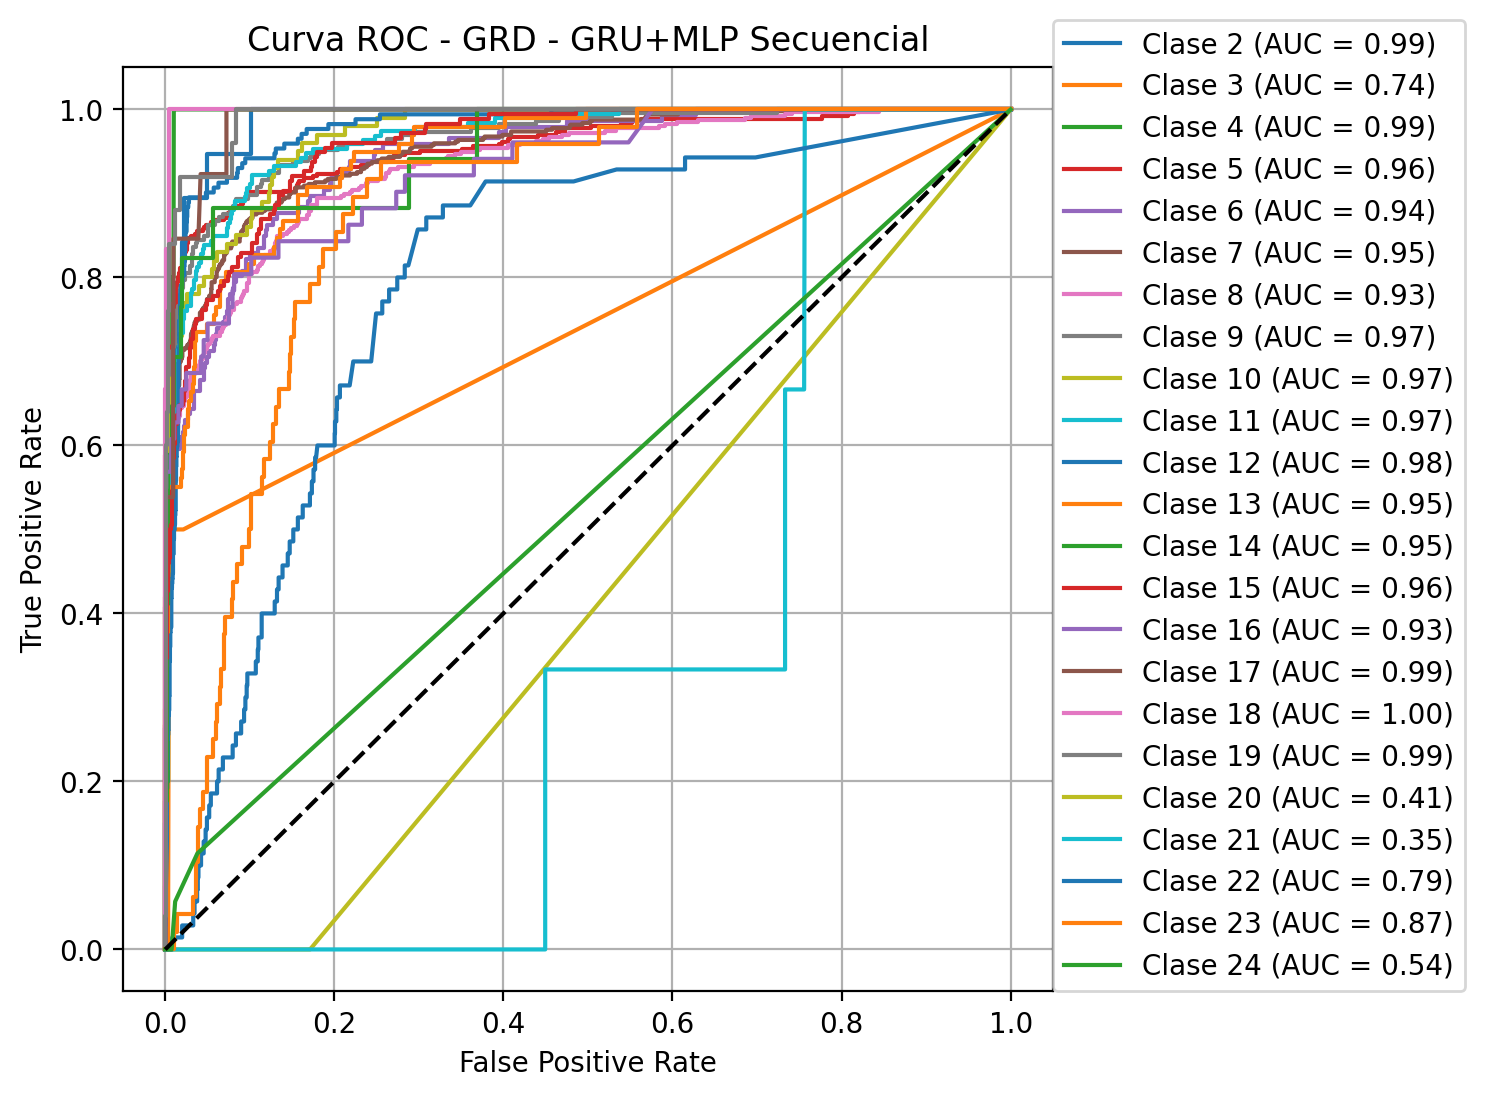

In [133]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

y_cdm_pred_proba = rf_cdm.predict_proba(X_test_scaled)  # Salida del modelo y_cdm
y_tipo_pred_proba = rf_tipo.predict_proba(X_tipo_test)  # Salida del modelo y_tipo
y_grd_pred_proba = rf_grd.predict_proba(X_grd_test)

y_cdm_test_bin = label_binarize(y_cdm_test, classes=np.unique(y_cdm))
y_tipo_test_bin = label_binarize(y_tipo_test, classes=np.unique(y_tipo))
y_grd_test_bin = label_binarize(y_grd_test, classes=np.unique(y_grd))

# Nombres opcionales
output_labels = ['CDM', 'Tipo', 'GRD']
y_preds = [y_cdm_pred_proba, y_tipo_pred_proba, y_grd_pred_proba]
y_trues = [y_cdm_test_bin, y_tipo_test_bin, y_grd_test_bin]

for i, (y_true, y_pred) in enumerate(zip(y_trues, y_preds)):
    n_classes = y_true.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular FPR, TPR para cada clase
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        fpr[j], tpr[j], _ = roc_curve(y_true[:, j], y_pred[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot ROC para cada clase en una figura
    plt.figure(figsize=(6, 6), dpi=200)
    for j in range(n_classes):
        if len(np.unique(y_true[:, j])) < 2:
            continue  # no hay positivos y negativos
        plt.plot(fpr[j], tpr[j], label=f'Clase {j+1} (AUC = {roc_auc[j]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Curva ROC - {output_labels[i]} - GRU+MLP Secuencial')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = (1,0))
    plt.grid(True)
    plt.show()

### SVM

In [134]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro')
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')

print("Random Forest Macro Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Random Forest Macro Metrics:
Accuracy:  0.7271
Precision: 0.4003
Recall:    0.3696
F1 Score:  0.3570


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [135]:
# SVM
svm = SVC(C=1, kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

SVM Report:
              precision    recall  f1-score   support

       01411       0.00      0.00      0.00         0
       01413       0.00      0.00      0.00         3
       01414       0.75      0.88      0.81        41
       01415       0.00      0.00      0.00         0
       01416       0.00      0.00      0.00         5
       01417       0.00      0.00      0.00         1
       01421       0.00      0.00      0.00         1
       01422       0.43      0.25      0.32        12
       01423       1.00      0.80      0.89         5
       01424       0.47      0.76      0.58        21
       01425       0.00      0.00      0.00         2
       01426       0.00      0.00      0.00         3
       02130       0.00      0.00      0.00         1
       02410       0.00      0.00      0.00         1
       02412       0.00      0.00      0.00         5
       03120       0.00      0.00      0.00         2
       03411       0.00      0.00      0.00         0
       03413   

In [136]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


precision = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='macro')
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='macro')

print("SVM Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

SVM Metrics:
Accuracy:  0.5709
Precision: 0.1975
Recall:    0.1920
F1 Score:  0.1842


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### KNN


In [137]:
# KNN
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Report:
              precision    recall  f1-score   support

       01410       0.00      0.00      0.00         0
       01413       0.00      0.00      0.00         3
       01414       0.17      0.34      0.23        41
       01416       0.00      0.00      0.00         5
       01417       0.00      0.00      0.00         1
       01421       0.00      0.00      0.00         1
       01422       0.00      0.00      0.00        12
       01423       0.29      0.40      0.33         5
       01424       0.25      0.52      0.34        21
       01425       0.00      0.00      0.00         2
       01426       0.00      0.00      0.00         3
       02130       0.00      0.00      0.00         1
       02410       0.00      0.00      0.00         1
       02412       0.00      0.00      0.00         5
       03120       0.00      0.00      0.00         2
       03413       0.00      0.00      0.00         5
       03414       0.00      0.00      0.00         2
       03415   

In [138]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_knn, average='macro')
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='macro')

print("KNN Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

KNN Metrics:
Accuracy:  0.3480
Precision: 0.0884
Recall:    0.0852
F1 Score:  0.0757


C:\Users\Francisco\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
